## Trading Simulation Analysis

This script uses different functions to visualize and analyze trade data for the 3 trading strategies developed. Additionally, we also import farma-french factors data available from Ken French's website and set the date column as the index.

### Imports

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from statsmodels.tsa.stattools import adfuller

### Define Helper Functions

In [4]:
def performance_summary(cumulative_pl):
    """
    Returns the Performance Stats for a given set of data.
    
    Inputs: 
        data - DataFrame with Date index and corresponding financial data.
    
    Output:
        summary_stats - DataFrame with summary statistics.
    """
    daily_returns = cumulative_pl
    
    summary_stats = pd.DataFrame()
    summary_stats['Mean'] = daily_returns.mean()
    summary_stats['Median'] = daily_returns.median()
    summary_stats['Volatility'] = daily_returns.std() 
    summary_stats['Sharpe Ratio'] = summary_stats['Mean'] / summary_stats['Volatility']
    summary_stats['Skewness'] = daily_returns.skew()
    summary_stats['Excess Kurtosis'] = daily_returns.kurtosis()
    summary_stats['Min'] = daily_returns.min()
    summary_stats['Max'] = daily_returns.max()

    wealth_index = 1000 * (1 + daily_returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    summary_stats['Max Drawdown'] = drawdowns.min()
    
    return summary_stats

In [51]:
def plot_trades_over_time(*cumulative_pls):
    """
    Plots gross option trades and gross stock trades over time for multiple trading strategies.
    
    Inputs:
        cumulative_pls - Tuple of DataFrames, each with Date index and financial data including
                         gross_option_trades and gross_stock_trades.
    """
    fig, axs = plt.subplots(2, len(cumulative_pls), figsize=(12 * len(cumulative_pls), 8))  

    for i, cumulative_pl in enumerate(cumulative_pls):
        axs[0, i].plot(cumulative_pl.index, cumulative_pl['gross_option_trades'], color='blue', marker='o', linestyle='-')
        axs[0, i].set_title(f'Gross Option Trades Over Time: Strategy {i+1}')  
        axs[0, i].set_xlabel('Date')  # X-axis label
        axs[0, i].set_ylabel('Gross Option Trades')  
        axs[0, i].grid(True)  

        axs[1, i].plot(cumulative_pl.index, cumulative_pl['gross_stock_trades'], color='red', marker='o', linestyle='-')
        axs[1, i].set_title(f'Gross Stock Trades Over Time: Strategy {i+1}')  
        axs[1, i].set_xlabel('Date')  
        axs[1, i].set_ylabel('Gross Stock Trades')  
        axs[1, i].grid(True)  

    plt.tight_layout()
    plt.show()

In [54]:
def plot_position_values_over_time(*cumulative_pls):
    """
    Plots option position value and stock position value over time for multiple trading strategies.
    
    Inputs:
        cumulative_pls - Tuple of DataFrames, each with Date index and financial data including
                         option_pos_value and stock_pos_value.
    """
    # Determine the number of trading strategies (dataframes)
    num_strategies = len(cumulative_pls)
    fig, axs = plt.subplots(2, num_strategies, figsize=(12 * num_strategies, 8), squeeze=False)  

    for i, cumulative_pl in enumerate(cumulative_pls):
        axs[0, i].plot(cumulative_pl.index, cumulative_pl['option_pos_value'], color='green', marker='o', linestyle='-')
        axs[0, i].set_title(f'Option Position Value Over Time: Strategy {i+1}')  
        axs[0, i].set_xlabel('Date')  # X-axis label
        axs[0, i].set_ylabel('Option Position Value ($)')  
        axs[0, i].grid(True)  

        axs[1, i].plot(cumulative_pl.index, cumulative_pl['stock_pos_value'], color='purple', marker='o', linestyle='-')
        axs[1, i].set_title(f'Stock Position Value Over Time: Strategy {i+1}')  
        axs[1, i].set_xlabel('Date')  
        axs[1, i].set_ylabel('Stock Position Value ($)')  
        axs[1, i].grid(True)  

    plt.tight_layout()
    plt.show()

In [57]:
def plot_pl_over_time(*cumulative_pls):
    """
    Plots option, stock, and net P&L values over time for multiple trading strategies.
    
    Inputs:
        cumulative_pls - Tuple of DataFrames, each with Date index and financial data.
    """
    # Determine the number of trading strategies (dataframes)
    num_strategies = len(cumulative_pls)
    fig, axs = plt.subplots(3, num_strategies, figsize=(12 * num_strategies, 12), squeeze=False)

    for i, cumulative_pl in enumerate(cumulative_pls):
        axs[0, i].plot(cumulative_pl.index, cumulative_pl['daily_option_PL'], color='orange', marker='o', linestyle='-')
        axs[0, i].set_title(f'Option P&L Over Time: Strategy {i+1}')
        axs[0, i].set_xlabel('Date')
        axs[0, i].set_ylabel('Option P&L ($)')
        axs[0, i].grid(True)
        
        axs[1, i].plot(cumulative_pl.index, cumulative_pl['daily_stock_PL'], color='cyan', marker='o', linestyle='-')
        axs[1, i].set_title(f'Stock P&L Over Time: Strategy {i+1}')
        axs[1, i].set_xlabel('Date')
        axs[1, i].set_ylabel('Stock P&L ($)')
        axs[1, i].grid(True)
        
        axs[2, i].plot(cumulative_pl.index, cumulative_pl['daily_net_PL'], color='magenta', marker='o', linestyle='-')
        axs[2, i].set_title(f'Net P&L Over Time: Strategy {i+1}')
        axs[2, i].set_xlabel('Date')
        axs[2, i].set_ylabel('Net P&L ($)')
        axs[2, i].grid(True)

    plt.tight_layout()
    plt.show()

In [61]:
def plot_cumulative_pl_over_time(*cumulative_pls):
    """
    Plots cumulative option, stock, and net P&L values over time for multiple trading strategies.
    
    Inputs:
        cumulative_pls - Tuple of DataFrames, each with Date index and financial data.
    """
    # Determine the number of trading strategies (dataframes)
    num_strategies = len(cumulative_pls)
    fig, axs = plt.subplots(3, num_strategies, figsize=(12 * num_strategies, 12), squeeze=False)

    for i, cumulative_pl in enumerate(cumulative_pls):
        axs[0, i].plot(cumulative_pl.index, cumulative_pl['option_PL'], color='orange', marker='o', linestyle='-')
        axs[0, i].set_title(f'Cumulative Option P&L Over Time: Strategy {i+1}')
        axs[0, i].set_xlabel('Date')
        axs[0, i].set_ylabel('Cumulative Option P&L ($)')
        axs[0, i].grid(True)
        
        axs[1, i].plot(cumulative_pl.index, cumulative_pl['stock_PL'], color='cyan', marker='o', linestyle='-')
        axs[1, i].set_title(f'Cumulative Stock P&L Over Time: Strategy {i+1}')
        axs[1, i].set_xlabel('Date')
        axs[1, i].set_ylabel('Cumulative Stock P&L ($)')
        axs[1, i].grid(True)
        
        axs[2, i].plot(cumulative_pl.index, cumulative_pl['net_PL'], color='magenta', marker='o', linestyle='-')
        axs[2, i].set_title(f'Cumulative Net P&L Over Time: Strategy {i+1}')
        axs[2, i].set_xlabel('Date')
        axs[2, i].set_ylabel('Cumulative Net P&L ($)')
        axs[2, i].grid(True)

    plt.tight_layout()
    plt.show()

In [66]:
def plot_trades_and_test_stationarity(*cumulative_pls):
    """
    This function creates subplots for 'gross_option_trades' and 'gross_stock_trades' from multiple 'cumulative_pl' DataFrames.
    It plots the original data along with their 5-day, 30-day, and 100-day rolling averages for each trading strategy.
    Additionally, it performs the Augmented Dickey-Fuller (ADF) test on both datasets to test for stationarity and 
    displays the test results (Test Statistic and P-Value) below each subplot.

    Inputs:
        cumulative_pls - Tuple of DataFrames with columns including 'gross_option_trades' and 'gross_stock_trades'.
    """
    num_strategies = len(cumulative_pls)
    fig, axes = plt.subplots(2, num_strategies, figsize=(20, 10), squeeze=False)

    for i, cumulative_pl in enumerate(cumulative_pls):
        # Plot for gross_option_trades
        axes[0, i].plot(cumulative_pl['gross_option_trades'], label="Gross Option Trades")
        axes[0, i].plot(cumulative_pl['gross_option_trades'].rolling(5).mean(), label="5-day MA")
        axes[0, i].plot(cumulative_pl['gross_option_trades'].rolling(30).mean(), label="30-day MA")
        axes[0, i].plot(cumulative_pl['gross_option_trades'].rolling(100).mean(), label="100-day MA")
        axes[0, i].set_title(f"Strategy {i+1}: Gross Option Trades", fontsize=18)
        axes[0, i].legend(fontsize=14)

        # ADF test on gross_option_trades
        adf_result_option = adfuller(cumulative_pl['gross_option_trades'].dropna(), maxlag=1)
        axes[0, i].text(0.01, -0.3, f'ADF Statistic: {adf_result_option[0]:.2f}\nP-Value: {adf_result_option[1]:.4f}', 
                        transform=axes[0, i].transAxes, fontsize=14)

        # Plot for gross_stock_trades
        axes[1, i].plot(cumulative_pl['gross_stock_trades'], label="Gross Stock Trades")
        axes[1, i].plot(cumulative_pl['gross_stock_trades'].rolling(5).mean(), label="5-day MA")
        axes[1, i].plot(cumulative_pl['gross_stock_trades'].rolling(30).mean(), label="30-day MA")
        axes[1, i].plot(cumulative_pl['gross_stock_trades'].rolling(100).mean(), label="100-day MA")
        axes[1, i].set_title(f"Strategy {i+1}: Gross Stock Trades", fontsize=18)
        axes[1, i].legend(fontsize=14)

        # ADF test on gross_stock_trades
        adf_result_stock = adfuller(cumulative_pl['gross_stock_trades'].dropna(), maxlag=1)
        axes[1, i].text(0.01, -0.3, f'ADF Statistic: {adf_result_stock[0]:.2f}\nP-Value: {adf_result_stock[1]:.4f}', 
                        transform=axes[1, i].transAxes, fontsize=14)

    plt.tight_layout()
    plt.show()

In [68]:
def plot_position_values_and_test_stationarity(*cumulative_pls):
    """
    This function creates subplots for 'option_pos_value' and 'stock_pos_value' from multiple 'cumulative_pl' DataFrames.
    It plots the original data along with their 5-day, 30-day, and 100-day rolling averages for each trading strategy.
    Additionally, it performs the Augmented Dickey-Fuller (ADF) test on both datasets to test for stationarity and 
    displays the test results (Test Statistic and P-Value) below each subplot.

    Inputs:
        cumulative_pls - Tuple of DataFrames with columns including 'option_pos_value' and 'stock_pos_value'.
    """
    num_strategies = len(cumulative_pls)
    fig, axes = plt.subplots(2, num_strategies, figsize=(20 * num_strategies, 10), squeeze=False)

    for i, cumulative_pl in enumerate(cumulative_pls):
        # Plot for option_pos_value
        axes[0, i].plot(cumulative_pl['option_pos_value'], label="Option Position Value")
        axes[0, i].plot(cumulative_pl['option_pos_value'].rolling(5).mean(), label="5-day MA")
        axes[0, i].plot(cumulative_pl['option_pos_value'].rolling(30).mean(), label="30-day MA")
        axes[0, i].plot(cumulative_pl['option_pos_value'].rolling(100).mean(), label="100-day MA")
        axes[0, i].set_title(f"Strategy {i+1}: Option Position Value", fontsize=18)
        axes[0, i].legend(fontsize=14)

        # Perform and display ADF test results for option_pos_value
        adf_result_option = adfuller(cumulative_pl['option_pos_value'].dropna(), maxlag=1)
        axes[0, i].text(0.01, -0.3, f'ADF Statistic: {adf_result_option[0]:.2f}\nP-Value: {adf_result_option[1]:.4f}', 
                        transform=axes[0, i].transAxes, fontsize=14)

        # Plot for stock_pos_value
        axes[1, i].plot(cumulative_pl['stock_pos_value'], label="Stock Position Value")
        axes[1, i].plot(cumulative_pl['stock_pos_value'].rolling(5).mean(), label="5-day MA")
        axes[1, i].plot(cumulative_pl['stock_pos_value'].rolling(30).mean(), label="30-day MA")
        axes[1, i].plot(cumulative_pl['stock_pos_value'].rolling(100).mean(), label="100-day MA")
        axes[1, i].set_title(f"Strategy {i+1}: Stock Position Value", fontsize=18)
        axes[1, i].legend(fontsize=14)

        # Perform and display ADF test results for stock_pos_value
        adf_result_stock = adfuller(cumulative_pl['stock_pos_value'].dropna(), maxlag=1)
        axes[1, i].text(0.01, -0.3, f'ADF Statistic: {adf_result_stock[0]:.2f}\nP-Value: {adf_result_stock[1]:.4f}', 
                        transform=axes[1, i].transAxes, fontsize=14)

    plt.tight_layout()
    plt.show()

In [71]:
def plot_pl_values_and_test_stationarity(*cumulative_pls):
    """
    This function creates subplots for 'daily_option_PL', 'daily_stock_PL', and 'daily_net_PL' from multiple 'cumulative_pl' DataFrames.
    It plots the original data along with their 5-day, 30-day, and 100-day rolling averages for each trading strategy.
    Additionally, it performs the Augmented Dickey-Fuller (ADF) test on all three datasets to test for stationarity and 
    displays the test results (Test Statistic and P-Value) below each subplot.

    Inputs:
        cumulative_pls - Tuple of DataFrames with columns including 'daily_option_PL', 'daily_stock_PL', and 'daily_net_PL'.
    """
    num_strategies = len(cumulative_pls)
    fig, axes = plt.subplots(3, num_strategies, figsize=(20 * num_strategies, 15), squeeze=False)

    for i, cumulative_pl in enumerate(cumulative_pls):
        # Plot for daily_option_PL
        axes[0, i].plot(cumulative_pl['daily_option_PL'], label="Daily Option P&L")
        axes[0, i].plot(cumulative_pl['daily_option_PL'].rolling(5).mean(), label="5-day MA")
        axes[0, i].plot(cumulative_pl['daily_option_PL'].rolling(30).mean(), label="30-day MA")
        axes[0, i].plot(cumulative_pl['daily_option_PL'].rolling(100).mean(), label="100-day MA")
        axes[0, i].set_title(f"Strategy {i+1}: Option P&L", fontsize=18)
        axes[0, i].legend(fontsize=14)

        # Perform and display ADF test results for daily_option_PL
        adf_result_option = adfuller(cumulative_pl['daily_option_PL'].dropna(), maxlag=1)
        axes[0, i].text(0.01, -0.3, f'ADF Statistic: {adf_result_option[0]:.2f}\nP-Value: {adf_result_option[1]:.4f}', 
                        transform=axes[0, i].transAxes, fontsize=14)

        # Plot for daily_stock_PL
        axes[1, i].plot(cumulative_pl['daily_stock_PL'], label="Daily Stock P&L")
        axes[1, i].plot(cumulative_pl['daily_stock_PL'].rolling(5).mean(), label="5-day MA")
        axes[1, i].plot(cumulative_pl['daily_stock_PL'].rolling(30).mean(), label="30-day MA")
        axes[1, i].plot(cumulative_pl['daily_stock_PL'].rolling(100).mean(), label="100-day MA")
        axes[1, i].set_title(f"Strategy {i+1}: Stock P&L", fontsize=18)
        axes[1, i].legend(fontsize=14)

        # Perform and display ADF test results for daily_stock_PL
        adf_result_stock = adfuller(cumulative_pl['daily_stock_PL'].dropna(), maxlag=1)
        axes[1, i].text(0.01, -0.3, f'ADF Statistic: {adf_result_stock[0]:.2f}\nP-Value: {adf_result_stock[1]:.4f}', 
                        transform=axes[1, i].transAxes, fontsize=14)

        # Plot for daily_net_PL
        axes[2, i].plot(cumulative_pl['daily_net_PL'], label="Daily Net P&L")
        axes[2, i].plot(cumulative_pl['daily_net_PL'].rolling(5).mean(), label="5-day MA")
        axes[2, i].plot(cumulative_pl['daily_net_PL'].rolling(30).mean(), label="30-day MA")
        axes[2, i].plot(cumulative_pl['daily_net_PL'].rolling(100).mean(), label="100-day MA")
        axes[2, i].set_title(f"Strategy {i+1}: Net P&L", fontsize=18)
        axes[2, i].legend(fontsize=14)

        # Perform and display ADF test results for daily_net_PL
        adf_result_net = adfuller(cumulative_pl['daily_net_PL'].dropna(), maxlag=1)
        axes[2, i].text(0.01, -0.3, f'ADF Statistic: {adf_result_net[0]:.2f}\nP-Value: {adf_result_net[1]:.4f}', 
                        transform=axes[2, i].transAxes, fontsize=14)

    plt.tight_layout()
    plt.show()

In [73]:
def plot_correlations(*cumulative_pls):
    """
    Creates subplots for each trading strategy, each displaying the correlation between two specific variables:
    1. Gross option trades vs. gross stock trades
    2. Option position value vs. stock position value
    3. Option P&L vs. Stock P&L

    Inputs:
        cumulative_pls - Tuple of DataFrames with required financial columns.
    """
    num_strategies = len(cumulative_pls)
    fig, axes = plt.subplots(3, num_strategies, figsize=(8 * num_strategies, 15), squeeze=False)

    for i, cumulative_pl in enumerate(cumulative_pls):
        # Correlation and plot for gross_option_trades and gross_stock_trades
        correlation1 = cumulative_pl['gross_option_trades'].corr(cumulative_pl['gross_stock_trades'])
        axes[0, i].scatter(cumulative_pl['gross_option_trades'], cumulative_pl['gross_stock_trades'],
                           label=f'Correlation: {correlation1:.2f}', color='blue', alpha=0.7)
        axes[0, i].set_xlabel('Gross Option Trades')
        axes[0, i].set_ylabel('Gross Stock Trades')
        axes[0, i].set_title(f'Strategy {i+1}: Gross Option vs. Stock Trades')
        axes[0, i].legend()
        axes[0, i].grid(True)

        # Correlation and plot for option_pos_value and stock_pos_value
        correlation2 = cumulative_pl['option_pos_value'].corr(cumulative_pl['stock_pos_value'])
        axes[1, i].scatter(cumulative_pl['option_pos_value'], cumulative_pl['stock_pos_value'],
                           label=f'Correlation: {correlation2:.2f}', color='red', alpha=0.7)
        axes[1, i].set_xlabel('Option Position Value')
        axes[1, i].set_ylabel('Stock Position Value')
        axes[1, i].set_title(f'Strategy {i+1}: Option vs. Stock Position Values')
        axes[1, i].legend()
        axes[1, i].grid(True)

        # Correlation and plot for option_PL and stock_PL
        correlation3 = cumulative_pl['daily_option_PL'].corr(cumulative_pl['daily_stock_PL'])
        axes[2, i].scatter(cumulative_pl['daily_option_PL'], cumulative_pl['daily_stock_PL'],
                           label=f'Correlation: {correlation3:.2f}', color='green', alpha=0.7)
        axes[2, i].set_xlabel('Daily Option P&L')
        axes[2, i].set_ylabel('Daily Stock P&L')
        axes[2, i].set_title(f'Strategy {i+1}: Daily Option vs. Stock P&L')
        axes[2, i].legend()
        axes[2, i].grid(True)

    plt.tight_layout()
    plt.show()

In [75]:
def plot_correlation_matrices(*cumulative_pls, fff_data):
    """
    Merges each cumulative_pl DataFrame from multiple trading strategies with fff_data DataFrame based on date indices,
    and creates subplots showing correlation matrices between selected financial metrics from each cumulative_pl
    and Fama-French factors from fff_data.

    Parameters:
        cumulative_pls (tuple of DataFrames): Financial metrics data from multiple strategies.
        fff_data (DataFrame): Fama-French factors data.
    """
    num_strategies = len(cumulative_pls)
    fig, axes = plt.subplots(num_strategies, 3, figsize=(30, 10 * num_strategies), squeeze=False)

    for i, cumulative_pl in enumerate(cumulative_pls):
        combined_df = cumulative_pl.merge(fff_data, left_index=True, right_index=True, how='left')

        subset1 = combined_df[['gross_option_trades', 'option_pos_value', 'daily_option_PL', 'Mkt-RF', 'SMB', 'HML']]
        subset2 = combined_df[['gross_stock_trades', 'stock_pos_value', 'daily_stock_PL', 'Mkt-RF', 'SMB', 'HML']]
        subset3 = combined_df[['gross_trades_value', 'daily_net_PL', 'Mkt-RF', 'SMB', 'HML']]

        # Correlation matrix for the first subset
        correlation_matrix1 = subset1.corr()
        sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm',
                    square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[i, 0])
        axes[i, 0].set_title(f'Strategy {i+1}: Options Data vs Fama-French Factors')

        # Correlation matrix for the second subset
        correlation_matrix2 = subset2.corr()
        sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm',
                    square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[i, 1])
        axes[i, 1].set_title(f'Strategy {i+1}: Stocks Data vs Fama-French Factors')

        # Correlation matrix for the third subset
        correlation_matrix3 = subset3.corr()
        sns.heatmap(correlation_matrix3, annot=True, fmt=".2f", cmap='coolwarm',
                    square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[i, 2])
        axes[i, 2].set_title(f'Strategy {i+1}: Gross Trades & Net P&L vs Fama-French Factors')

    plt.tight_layout()
    plt.show()

In [77]:
def run_regression_option_PL(*combined_dfs):
    """
    Performs linear regression using the Fama-French three factors as independent variables
    and option_PL from each combined_df as the dependent variable.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include option_PL and the Fama-French factors.
    """
    for i, combined_df in enumerate(combined_dfs):
        X = combined_df[['Mkt-RF', 'SMB', 'HML']]
        X = sm.add_constant(X)  # Adds a constant term to the predictor

        y = combined_df['option_PL']

        model = sm.OLS(y, X).fit()

        print(f'Strategy {i+1}: R-squared of the regression of option_PL on the Fama-French factors: {round(model.rsquared, 6)}\n')
        print(f'Strategy {i+1} regression summary:\n{model.summary()}\n{"-"*100}\n')

In [83]:
def run_regression_stock_PL(*combined_dfs):
    """
    Performs linear regression using the Fama-French three factors as independent variables
    and stock_PL from each combined_df as the dependent variable.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include stock_PL and the Fama-French factors.
    """
    for i, combined_df in enumerate(combined_dfs):
        X = combined_df[['Mkt-RF', 'SMB', 'HML']]
        X = sm.add_constant(X)  # Adds a constant term to the predictor

        y = combined_df['stock_PL']

        model = sm.OLS(y, X).fit()

        print(f'Strategy {i+1}: R-squared of the regression of stock_PL on the Fama-French factors: {round(model.rsquared, 6)}\n')
        print(f'Strategy {i+1} regression summary:\n{model.summary()}\n{"-"*100}\n')

In [85]:
def run_regression_net_PL(*combined_dfs):
    """
    Performs linear regression using the Fama-French three factors as independent variables
    and net_PL from each combined_df as the dependent variable.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include net_PL and the Fama-French factors.
    """
    for i, combined_df in enumerate(combined_dfs):
        X = combined_df[['Mkt-RF', 'SMB', 'HML']]
        X = sm.add_constant(X)  # Adds a constant term to the predictor

        y = combined_df['net_PL']

        model = sm.OLS(y, X).fit()

        print(f'Strategy {i+1}: R-squared of the regression of net_PL on the Fama-French factors: {round(model.rsquared, 6)}\n')
        print(f'Strategy {i+1} regression summary:\n{model.summary()}\n{"-"*100}\n')

In [87]:
def plot_rolling_volatility(*combined_dfs, window_size=30):
    """
    Calculates and plots the rolling standard deviation of returns (volatility)
    from the net profit and loss (net_PL) of multiple trading strategies.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include the net_PL column.
        window_size (int): The window size for calculating rolling volatility (default is 30 days).
    """
    fig, axes = plt.subplots(len(combined_dfs), 1, figsize=(14, 7 * len(combined_dfs)), squeeze=False)

    for i, combined_df in enumerate(combined_dfs):
        if 'net_PL' not in combined_df.columns:
            raise ValueError("DataFrame must contain a 'net_PL' column")

        combined_df['daily_returns'] = combined_df['net_PL'].pct_change()
        combined_df['rolling_volatility'] = combined_df['daily_returns'].rolling(window=window_size).std()

        axes[i, 0].plot(combined_df.index, combined_df['rolling_volatility'], label=f'{window_size}-Day Rolling Volatility')
        axes[i, 0].set_title(f'Strategy {i+1}: Volatility Clustering - {window_size}-Day Rolling Volatility of Returns')
        axes[i, 0].set_xlabel('Date')
        axes[i, 0].set_ylabel('Rolling Volatility')
        axes[i, 0].legend()
        axes[i, 0].grid(True)

    plt.tight_layout()
    plt.show()

In [89]:
def plot_pnl_distribution(*combined_dfs):
    """
    Creates histograms and density plots for the distribution of daily and monthly P&L 
    from multiple trading strategies, based on the net_PL column of each combined_df DataFrame.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include the net_PL column.
    """
    for i, combined_df in enumerate(combined_dfs):
        if 'net_PL' not in combined_df.columns:
            raise ValueError("DataFrame must contain a 'net_PL' column")

        combined_df['daily_pnl'] = combined_df['net_PL'].diff()
        combined_df['monthly_pnl'] = combined_df['net_PL'].resample('M').last().diff()

        fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)
        fig.suptitle(f'Strategy {i+1}: Profit and Loss Distribution')

        sns.histplot(combined_df['daily_pnl'].dropna(), bins=50, kde=True, ax=axes[0, 0])
        axes[0, 0].set_title('Daily P&L Distribution')
        axes[0, 0].set_xlabel('Daily P&L')
        axes[0, 0].set_ylabel('Frequency')

        sns.kdeplot(combined_df['daily_pnl'].dropna(), ax=axes[0, 1], fill=True)
        axes[0, 1].set_title('Daily P&L Density')
        axes[0, 1].set_xlabel('Daily P&L')
        axes[0, 1].set_ylabel('Density')

        sns.histplot(combined_df['monthly_pnl'].dropna(), bins=50, kde=True, ax=axes[1, 0])
        axes[1, 0].set_title('Monthly P&L Distribution')
        axes[1, 0].set_xlabel('Monthly P&L')
        axes[1, 0].set_ylabel('Frequency')

        sns.kdeplot(combined_df['monthly_pnl'].dropna(), ax=axes[1, 1], fill=True)
        axes[1, 1].set_title('Monthly P&L Density')
        axes[1, 1].set_xlabel('Monthly P&L')
        axes[1, 1].set_ylabel('Density')

        plt.show()

In [94]:
def plot_trade_activity_comparison(*combined_dfs, frequency='D'):
    """
    Creates bar charts to compare 'gross_option_trades' and 'gross_stock_trades' based on the specified frequency
    for multiple trading strategies, without displaying x-axis labels.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include 'gross_option_trades' and 'gross_stock_trades' columns.
        frequency (str): Frequency for resampling data. 'D' for daily, 'W' for weekly.
    """
    for i, combined_df in enumerate(combined_dfs):
        resampled_data = combined_df[['gross_option_trades', 'gross_stock_trades']].resample(frequency).sum()

        # Plotting
        plt.figure(figsize=(14, 7))
        resampled_data.plot(kind='bar', width=0.8)
        plt.title(f'Strategy {i+1}: Comparison of Trading Activity (Frequency: {frequency})')
        plt.xlabel('Date')
        plt.ylabel('Volume of Trades')
        plt.legend(['Gross Option Trades', 'Gross Stock Trades'])
        plt.grid(axis='y', linestyle='--')
        
        # Remove x-axis labels
        plt.xticks(ticks=[], labels=[])  # Remove x-axis tick labels

        plt.show()

In [20]:
def plot_pl_boxplots(combined_df):
    """
    Creates box plots to visualize the distribution, median, and outliers of 'option_PL', 
    'stock_PL', and 'net_PL' from the combined_df DataFrame.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes 'option_PL', 'stock_PL', and 'net_PL' columns.
    """
    plt.figure(figsize=(10, 6))

    pl_data = combined_df[['option_PL', 'stock_PL', 'net_PL']]
    pl_data_melted = pl_data.melt(var_name='Type', value_name='P&L')

    sns.boxplot(x='Type', y='P&L', data=pl_data_melted)
    
    plt.title('Distribution of P&L for Options, Stocks, and Net')
    plt.xlabel('P&L Type')
    plt.ylabel('Profit and Loss')
    plt.grid(axis='y', linestyle='--')

    plt.show()

In [96]:
def plot_pl_boxplots(*combined_dfs):
    """
    Creates box plots to visualize the distribution, median, and outliers of 'option_PL', 
    'stock_PL', and 'net_PL' from multiple combined_df DataFrames.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include 'option_PL', 'stock_PL', and 'net_PL' columns.
    """
    for i, combined_df in enumerate(combined_dfs):
        plt.figure(figsize=(10, 6))

        pl_data = combined_df[['option_PL', 'stock_PL', 'net_PL']]
        pl_data_melted = pl_data.melt(var_name='Type', value_name='P&L')

        sns.boxplot(x='Type', y='P&L', data=pl_data_melted)
        
        plt.title(f'Strategy {i+1}: Distribution of P&L for Options, Stocks, and Net')
        plt.xlabel('P&L Type')
        plt.ylabel('Profit and Loss')
        plt.grid(axis='y', linestyle='--')

        plt.show()

In [98]:
def calculate_profit_factor_analysis(*combined_dfs):
    """
    Calculates and analyzes the profit factor (total gains / total losses) for both options and stocks
    from multiple combined_df DataFrames.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include 'daily_option_PL' and 'daily_stock_PL' columns.
    """
    for i, combined_df in enumerate(combined_dfs):
        if 'daily_option_PL' not in combined_df.columns or 'daily_stock_PL' not in combined_df.columns:
            raise ValueError(f"DataFrame for Strategy {i+1} must contain both 'daily_option_PL' and 'daily_stock_PL' columns")

        # Calculate total gains and total losses for options
        option_gains = combined_df[combined_df['daily_option_PL'] > 0]['daily_option_PL'].sum()
        option_losses = combined_df[combined_df['daily_option_PL'] < 0]['daily_option_PL'].sum()

        # Avoid division by zero and negative values for losses
        if option_losses == 0:
            option_profit_factor = 'Infinity'  # No losses
        else:
            option_profit_factor = option_gains / abs(option_losses)

        # Calculate total gains and total losses for stocks
        stock_gains = combined_df[combined_df['daily_stock_PL'] > 0]['daily_stock_PL'].sum()
        stock_losses = combined_df[combined_df['daily_stock_PL'] < 0]['daily_stock_PL'].sum()

        # Avoid division by zero and negative values for losses
        if stock_losses == 0:
            stock_profit_factor = 'Infinity'  # No losses
        else:
            stock_profit_factor = stock_gains / abs(stock_losses)

        print(f"Strategy {i+1}: Option Profit Factor: {option_profit_factor}")
        print(f"Strategy {i+1}: Stock Profit Factor: {stock_profit_factor}\n")

In [100]:
def plot_pareto_chart(*combined_dfs):
    """
    Creates a Pareto chart for each combined_df to identify the most significant 'gross_trades_value' segments 
    contributing to 'daily_net_PL' for multiple trading strategies.

    Parameters:
        combined_dfs (tuple of DataFrames): DataFrames that each include 'daily_net_PL' and 'gross_trades_value' columns.
    """
    for i, combined_df in enumerate(combined_dfs):
        if 'daily_net_PL' not in combined_df.columns or 'gross_trades_value' not in combined_df.columns:
            raise ValueError(f"DataFrame for Strategy {i+1} must contain 'daily_net_PL' and 'gross_trades_value' columns")

        # Aggregate net profit and loss by 'gross_trades_value'
        value_impact = combined_df.groupby('gross_trades_value')['daily_net_PL'].sum().sort_values(ascending=False)
        value_impact = value_impact.reset_index()
        value_impact['cumulative_percentage'] = value_impact['daily_net_PL'].cumsum() / value_impact['daily_net_PL'].sum() * 100

        # Create the bar plot for 'gross_trades_value' segments
        fig, ax = plt.subplots()
        ax.bar(value_impact['gross_trades_value'], value_impact['daily_net_PL'], color='C0')

        # Create the line plot for cumulative percentage
        ax2 = ax.twinx()
        ax2.plot(value_impact['gross_trades_value'], value_impact['cumulative_percentage'], color='C1', marker="D", ms=7)
        ax2.yaxis.set_major_formatter(PercentFormatter())

        ax.tick_params(axis='y', colors='C0')
        ax2.tick_params(axis='y', colors='C1')

        plt.title(f'Strategy {i+1}: Pareto Chart - Significant Gross Trade Values Contributing to Daily Net PL')
        ax.set_xlabel('Gross Trades Value')
        ax.set_ylabel('Daily Net PL')
        ax2.set_ylabel('Cumulative Percentage')

        # Rotate X-axis labels for better readability
        plt.xticks(rotation=45)

        plt.show()

### Load Data

In [44]:
PL_trade_1 = pd.read_csv("PL_trade_1.csv")
PL_trade_1['date'] = pd.to_datetime(PL_trade_1['date'])
PL_trade_1.set_index('date', inplace=True)
PL_trade_1

/var/folders/37/_d3r4q095fs6bf6w7rqvdkf40000gn/T/ipykernel_35323/3100753386.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  PL_trade_1['date'] = pd.to_datetime(PL_trade_1['date'])


gross_stock_trades  gross_option_trades  gross_trades_value  \
date                                                                      
2018-01-02             0.00000                    0             0.00000   
2018-01-03             0.00000                    0             0.00000   
2018-01-04             0.00000                    0             0.00000   
2018-01-05             0.00000                    0             0.00000   
2018-01-08             0.00000                    0             0.00000   
...                        ...                  ...                 ...   
2023-02-22        364328.72860                20355        384683.72860   
2023-02-23         62357.23996                    0         62357.23996   
2023-02-24        174798.03070                19646        194444.03070   
2023-02-27        449386.13830                21000        470386.13830   
2023-02-28         21047.62728                35442         56489.62728   

            stock_trading_costs  option_trading_costs  net_trading_costs  \
date                                                                       
2018-01-02             0.000000                0.0000           0.000000   
2018-01-03             0.000000                0.0000           0.000000   
2018-01-04             0.000000                0.0000           0.000000   
2018-01-05             0.000000                0.0000           0.000000   
2018-01-08             0.000000                0.0000           0.000000   
...                         ...                   ...                ...   
2023-02-22            36.432873                2.0355          38.468373   
2023-02-23             6.235724                0.0000           6.235724   
2023-02-24            17.479803                1.9646          19.444403   
2023-02-27            44.938614                2.1000          47.038614   
2023-02-28             2.104763                3.5442           5.648963   

            stock_pos_value  option_pos_value  gross_pos_value     stock_PL  \
date                                                                          
2018-01-02          0.00000                 0          0.00000       0.0000   
2018-01-03          0.00000                 0          0.00000       0.0000   
2018-01-04          0.00000                 0          0.00000       0.0000   
2018-01-05          0.00000                 0          0.00000       0.0000   
2018-01-08          0.00000                 0          0.00000       0.0000   
...                     ...               ...              ...          ...   
2023-02-22    -315409.33850            -43198    -358607.33850 -636040.8363   
2023-02-23    -254729.89200            -39426    -294155.89200 -636047.0721   
2023-02-24    -426806.80260            -62314    -489120.80260 -636064.5519   
2023-02-27      21125.70736            -37092     -15966.29264 -638333.0955   
2023-02-28          0.00000                 0          0.00000 -638874.4665   

            ...  initial_cash    interest  lever_cash  leverage_fee  \
date        ...                                                       
2018-01-02  ...   1000000.000   29.584646         0.0           0.0   
2018-01-03  ...   1000029.585   30.557393         0.0           0.0   
2018-01-04  ...   1000060.142   33.756587         0.0           0.0   
2018-01-05  ...   1000093.899   34.035027         0.0           0.0   
2018-01-08  ...   1000127.934   34.173373         0.0           0.0   
...         ...           ...         ...         ...           ...   
2023-02-22  ...   1468668.162  184.932685         0.0           0.0   
2023-02-23  ...   1406455.324  180.173640         0.0           0.0   
2023-02-24  ...   1601004.340  198.630604         0.0           0.0   
2023-02-27  ...   1130769.794  139.792991         0.0           0.0   
2023-02-28  ...   1116509.565  134.936030         0.0           0.0   

            end_kapital  net_short_fees  net_interest_paid  \
date                             

In [45]:
PL_trade_2 = pd.read_csv("PL_trade_2.csv")
PL_trade_2['date'] = pd.to_datetime(PL_trade_2['date'])
PL_trade_2.set_index('date', inplace=True)
PL_trade_2

/var/folders/37/_d3r4q095fs6bf6w7rqvdkf40000gn/T/ipykernel_35323/741108565.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  PL_trade_2['date'] = pd.to_datetime(PL_trade_2['date'])


gross_stock_trades  gross_option_trades  gross_trades_value  \
date                                                                      
2018-01-02                 0.0                    0                 0.0   
2018-01-03                 0.0                    0                 0.0   
2018-01-04                 0.0                    0                 0.0   
2018-01-05                 0.0                    0                 0.0   
2018-01-08                 0.0                    0                 0.0   
...                        ...                  ...                 ...   
2023-02-22                 0.0                    0                 0.0   
2023-02-23                 0.0                    0                 0.0   
2023-02-24                 0.0                    0                 0.0   
2023-02-27                 0.0                    0                 0.0   
2023-02-28                 0.0                    0                 0.0   

            stock_trading_costs  option_trading_costs  net_trading_costs  \
date                                                                       
2018-01-02                  0.0                   0.0                0.0   
2018-01-03                  0.0                   0.0                0.0   
2018-01-04                  0.0                   0.0                0.0   
2018-01-05                  0.0                   0.0                0.0   
2018-01-08                  0.0                   0.0                0.0   
...                         ...                   ...                ...   
2023-02-22                  0.0                   0.0                0.0   
2023-02-23                  0.0                   0.0                0.0   
2023-02-24                  0.0                   0.0                0.0   
2023-02-27                  0.0                   0.0                0.0   
2023-02-28                  0.0                   0.0                0.0   

            stock_pos_value  option_pos_value  gross_pos_value     stock_PL  \
date                                                                          
2018-01-02              0.0                 0              0.0       0.0000   
2018-01-03              0.0                 0              0.0       0.0000   
2018-01-04              0.0                 0              0.0       0.0000   
2018-01-05              0.0                 0              0.0       0.0000   
2018-01-08              0.0                 0              0.0       0.0000   
...                     ...               ...              ...          ...   
2023-02-22              0.0                 0              0.0  797173.5422   
2023-02-23              0.0                 0              0.0  797173.5422   
2023-02-24              0.0                 0              0.0  797173.5422   
2023-02-27              0.0                 0              0.0  797173.5422   
2023-02-28              0.0                 0              0.0  797173.5422   

            ...  initial_cash   interest  lever_cash  leverage_fee  \
date        ...                                                      
2018-01-02  ...  1.000000e+06  29.584646         0.0           0.0   
2018-01-03  ...  1.000030e+06  30.557393         0.0           0.0   
2018-01-04  ...  1.000060e+06  33.756587         0.0           0.0   
2018-01-05  ...  1.000094e+06  34.035027         0.0           0.0   
2018-01-08  ...  1.000128e+06  34.173373         0.0           0.0   
...         ...           ...        ...         ...           ...   
2023-02-22  ...  6.829668e+05  85.998246         0.0           0.0   
2023-02-23  ...  6.830528e+05  87.502326         0.0           0.0   
2023-02-24  ...  6.831403e+05  84.754657         0.0           0.0   
2023-02-27  ...  6.832251e+05  84.464651         0.0           0.0   
2023-02-28  ...  6.833095e+05  82.581537         0.0           0.0   

             end_kapital  net_short_fees  net_interest_paid  \
date                                         

In [63]:
PL_trade_3 = pd.read_csv("PL_trade_3.csv")
PL_trade_3['date'] = pd.to_datetime(PL_trade_3['date'])
PL_trade_3.set_index('date', inplace=True)
PL_trade_3

/var/folders/37/_d3r4q095fs6bf6w7rqvdkf40000gn/T/ipykernel_35323/995963282.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  PL_trade_3['date'] = pd.to_datetime(PL_trade_3['date'])


gross_stock_trades  gross_option_trades  gross_trades_value  \
date                                                                      
2018-01-02             0.00000                    0              0.0000   
2018-01-03             0.00000                    0              0.0000   
2018-01-04             0.00000                    0              0.0000   
2018-01-05             0.00000                    0              0.0000   
2018-01-08             0.00000                    0              0.0000   
...                        ...                  ...                 ...   
2023-02-22        368794.36930                 1605         370399.3693   
2023-02-23         97096.86592                17620         114716.8659   
2023-02-24        306543.24770                19646         326189.2477   
2023-02-27        483284.30820                 4665         487949.3082   
2023-02-28         38086.60915                82947         121033.6092   

            stock_trading_costs  option_trading_costs  net_trading_costs  \
date                                                                       
2018-01-02             0.000000                0.0000           0.000000   
2018-01-03             0.000000                0.0000           0.000000   
2018-01-04             0.000000                0.0000           0.000000   
2018-01-05             0.000000                0.0000           0.000000   
2018-01-08             0.000000                0.0000           0.000000   
...                         ...                   ...                ...   
2023-02-22            36.879437                0.1605          37.039937   
2023-02-23             9.709687                1.7620          11.471687   
2023-02-24            30.654325                1.9646          32.618925   
2023-02-27            48.328431                0.4665          48.794931   
2023-02-28             3.808661                8.2947          12.103361   

            stock_pos_value  option_pos_value  gross_pos_value     stock_PL  \
date                                                                          
2018-01-02           0.0000                 0           0.0000        0.000   
2018-01-03           0.0000                 0           0.0000        0.000   
2018-01-04           0.0000                 0           0.0000        0.000   
2018-01-05           0.0000                 0           0.0000        0.000   
2018-01-08           0.0000                 0           0.0000        0.000   
...                     ...               ...              ...          ...   
2023-02-22     -310943.6978            -62028     -372971.6978 -1704121.546   
2023-02-23     -215500.8707            -75166     -290666.8707 -1704131.256   
2023-02-24     -519742.0574            -97544     -617286.0574 -1704161.910   
2023-02-27      -38227.8985            -86690     -124917.8985 -1706433.844   
2023-02-28           0.0000                 0           0.0000 -1707469.375   

            ...  initial_cash    interest  lever_cash  leverage_fee  \
date        ...                                                       
2018-01-02  ...   1000000.000   29.584646         0.0           0.0   
2018-01-03  ...   1000029.585   30.557393         0.0           0.0   
2018-01-04  ...   1000060.142   33.756587         0.0           0.0   
2018-01-05  ...   1000093.899   34.035027         0.0           0.0   
2018-01-08  ...   1000127.934   34.173373         0.0           0.0   
...         ...           ...         ...         ...           ...   
2023-02-22  ...   2121097.536  267.085698         0.0           0.0   
2023-02-23  ...   2041847.270  261.570382         0.0           0.0   
2023-02-24  ...   2368197.588  293.813392         0.0           0.0   
2023-02-27  ...   1880488.322  232.477988         0.0           0.0   
2023-02-28  ...   1759675.088  212.665953         0.0           0.0   

            end_kapital  net_short_fees  net_interest_paid  \
date                             

In [47]:
fff_data = pd.read_csv('F-F_Research_Data_Factors_daily.CSV')
fff_data['date'] = pd.to_datetime(fff_data['date'])
fff_data.set_index('date', inplace=True)
fff_data

/var/folders/37/_d3r4q095fs6bf6w7rqvdkf40000gn/T/ipykernel_35323/2428138270.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fff_data['date'] = pd.to_datetime(fff_data['date'])


Mkt-RF   SMB   HML     RF
date                                 
2026-07-01    0.10 -0.25 -0.27  0.009
2026-07-02    0.45 -0.33 -0.06  0.009
2026-07-06    0.17  0.30 -0.39  0.009
2026-07-07    0.09 -0.58  0.02  0.009
2026-07-08    0.21 -0.38  0.19  0.009
...            ...   ...   ...    ...
2024-01-25    0.46  0.04  0.56  0.022
2024-01-26   -0.02  0.40 -0.27  0.022
2024-01-29    0.85  1.07 -0.59  0.022
2024-01-30   -0.13 -1.26  0.84  0.022
2024-01-31   -1.74 -0.92 -0.30  0.022

[25670 rows x 4 columns]

### Data Analysis

In [48]:
performance_summary(PL_trade_1)

/Users/raafayuqaily/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Mean        Median    Volatility  Sharpe Ratio  \
gross_stock_trades    5.924315e+05  3.432981e+05  7.339366e+05      0.807197   
gross_option_trades   1.750643e+04  9.078500e+03  2.449568e+04      0.714674   
gross_trades_value    6.099379e+05  3.611404e+05  7.407474e+05      0.823409   
stock_trading_costs   5.924315e+01  3.432981e+01  7.339366e+01      0.807197   
option_trading_costs  1.750643e+00  9.078500e-01  2.449568e+00      0.714674   
net_trading_costs     6.099379e+01  3.611404e+01  7.407474e+01      0.823409   
stock_pos_value       3.752555e+05  1.469597e+05  1.604310e+06      0.233905   
option_pos_value     -8.080070e+04 -6.545700e+04  2.097862e+05     -0.385157   
gross_pos_value       2.944548e+05  8.302307e+04  1.556962e+06      0.189121   
stock_PL             -3.469488e+04 -4.172414e+04  2.496436e+05     -0.138978   
option_PL             1.016892e+05  7.503284e+04  2.210585e+05      0.460011   
net_PL                6.699437e+04  3.729012e+04  1.221955e+05      0.548256   
daily_stock_PL       -4.921991e+02 -2.651589e+01  8.369149e+03     -0.058811   
daily_option_PL       5.726654e+02  0.000000e+00  8.968539e+03      0.063853   
daily_net_PL          8.046626e+01 -1.157372e+01  5.188377e+03      0.015509   
start_cash            1.079254e+06  1.051728e+06  1.240356e+05      8.701157   
initial_kapital       1.079324e+06  1.051700e+06  1.240365e+05      8.701661   
short_fee             1.043535e+01  0.000000e+00  2.737500e+01      0.381200   
initial_cash          1.052367e+06  9.307892e+05  1.142975e+06      0.920726   
interest              2.983686e+01  3.541307e+00  4.619027e+01      0.645956   
lever_cash            2.669067e+05  0.000000e+00  7.212898e+05      0.370041   
leverage_fee          1.000297e+01  0.000000e+00  3.897554e+01      0.256647   
end_kapital           1.079343e+06  1.051819e+06  1.240204e+05      8.702949   
net_short_fees        6.414806e+03  6.976890e+03  3.387926e+03      1.893431   
net_interest_paid     2.134996e+04  2.599523e+04  9.355687e+03      2.282031   
net_interest_earned   2.586065e+03  2.055672e+03  2.199032e+03      1.176001   
net_pos_value         1.079935e+06  1.054309e+06  1.247928e+05      8.653825   
tot_cash              9.754367e+06  9.890187e+06  1.546236e+06      6.308458   

                      Skewness  Excess Kurtosis           Min           Max  \
gross_stock_trades    2.354224         8.253499  0.000000e+00  6.412519e+06   
gross_option_trades   2.145489         5.345669  0.000000e+00  1.578750e+05   
gross_trades_value    2.336678         8.116444  0.000000e+00  6.412519e+06   
stock_trading_costs   2.354224         8.253499  0.000000e+00  6.412519e+02   
option_trading_costs  2.145489         5.345669  0.000000e+00  1.578750e+01   
net_trading_costs     2.336678         8.116444  0.000000e+00  6.412519e+02   
stock_pos_value       0.024513         2.181142 -5.886089e+06  6.684704e+06   
option_pos_value      0.253853         0.655672 -6.711300e+05  5.873630e+05   
gross_pos_value       0.121650         2.502866 -5.520087e+06  7.148315e+06   
stock_PL             -0.071932        -0.170702 -6.388745e+05  5.163709e+05   
option_PL             0.588947         0.600919 -3.638743e+05  7.433197e+05   
net_PL                0.777775        -0.103997 -9.694342e+04  4.269232e+05   
daily_stock_PL        1.725971        18.123452 -6.006872e+04  7.029373e+04   
daily_option_PL      -1.022962        10.837477 -5.005651e+04  6.995727e+04   
daily_net_PL         -0.987223        13.598898 -3.578368e+04  3.236006e+04   
start_cash            0.799383        -0.138466  9.169981e+05  1.443109e+06   
initial_kapital       0.797592        -0.139962  9.169759e+05  1.443100e+06   
short_fee             3.887240        18.033096 -1.268325e+00  2.428192e+02   
initial_cash          1.840538         4.178353  0.000000e+00  6.659374e+06   
interest              2.462929         7.910559 -2.087234e+01  3.149349e+02   
lever_cash            3.781740        16.880801  0

Trading strategy 1 performance summary data reveals that it primarily leans towards stock trading, as indicated by the higher mean and median values in gross stock trades compared to option trades. The data shows overall profitability, with positive net Profit and Loss (P&L). However, there is notable volatility and risk, as suggested by the high standard deviations and the presence of negative skewness and positive excess kurtosis in both stock and option trades. These metrics imply that while the central tendency is profitable, there are significant tails or outliers that suggest periods of substantial losses, particularly highlighted by the maximum drawdown values, pointing towards moments of extreme decline in portfolio value.

Although short selling and leveraging tend to enhance profitability, they also introduce substantial risk, as evidenced by the infinite values in maximum drawdowns for some metrics, signaling potentially unlimited downside in some scenarios. Despite the overall profitability indicated by the mean net P&L, the significant maximum drawdown and the pattern of risk (as shown by volatility, skewness, and kurtosis metrics) suggest that the strategy might be subject to severe losses. The positive Sharpe ratio for net P&L suggests that the strategy provides a favorable return on risk-adjusted basis, but the underlying risks highlighted by the extreme values and distribution tails should not be overlooked.

In [49]:
performance_summary(PL_trade_2)

/Users/raafayuqaily/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Mean        Median     Volatility  Sharpe Ratio  \
gross_stock_trades    1.933879e+05  0.000000e+00  609598.390243      0.317238   
gross_option_trades   5.317485e+03  0.000000e+00   19896.957856      0.267251   
gross_trades_value    1.987054e+05  0.000000e+00  618058.226747      0.321500   
stock_trading_costs   1.933879e+01  0.000000e+00      60.959839      0.317238   
option_trading_costs  5.317485e-01  0.000000e+00       1.989696      0.267251   
net_trading_costs     1.987054e+01  0.000000e+00      61.805823      0.321500   
stock_pos_value      -4.745100e+04  0.000000e+00  969208.000589     -0.048959   
option_pos_value      4.250401e+04  0.000000e+00  111077.523390      0.382652   
gross_pos_value      -4.946988e+03  0.000000e+00  969267.911732     -0.005104   
stock_PL              3.694258e+05  1.126285e+05  314278.056355      1.175474   
option_PL            -5.249225e+05 -1.378639e+05  468552.307021     -1.120307   
net_PL               -1.554966e+05 -4.706002e+04  160436.783137     -0.969208   
daily_stock_PL        6.141553e+02  0.000000e+00    5674.511433      0.108231   
daily_option_PL      -8.836072e+02  0.000000e+00    6242.512891     -0.141547   
daily_net_PL         -2.694520e+02  0.000000e+00    3918.606039     -0.068762   
start_cash            8.644422e+05  9.782579e+05  155776.372499      5.549251   
initial_kapital       8.641691e+05  9.782560e+05  155802.539868      5.546566   
short_fee             3.635975e+00  0.000000e+00      17.188871      0.211531   
initial_cash          9.572315e+05  9.782579e+05  687646.847161      1.392039   
interest              3.014062e+01  3.349487e+01      30.913563      0.974997   
lever_cash            9.023479e+04  0.000000e+00  556606.755466      0.162116   
leverage_fee          9.724585e-01  0.000000e+00       5.716310      0.170120   
end_kapital           8.641983e+05  9.782569e+05  155811.821465      5.546423   
net_short_fees        3.129886e+03  3.493760e+03    1561.184468      2.004815   
net_interest_paid     2.351500e+04  2.930935e+04   10123.778714      2.322750   
net_interest_earned   6.901988e+02  3.907693e+02     422.725771      1.632734   
net_pos_value         8.620789e+05  9.782434e+05  156272.602776      5.516507   
tot_cash              9.824506e+06  9.924143e+06  979489.191189     10.030234   

                      Skewness  Excess Kurtosis           Min           Max  \
gross_stock_trades    4.527659        25.512258  0.000000e+00  6.412519e+06   
gross_option_trades   3.985601        15.929008  0.000000e+00  1.578750e+05   
gross_trades_value    4.479469        24.919250  0.000000e+00  6.412519e+06   
stock_trading_costs   4.527659        25.512258  0.000000e+00  6.412519e+02   
option_trading_costs  3.985601        15.929008  0.000000e+00  1.578750e+01   
net_trading_costs     4.479469        24.919250  0.000000e+00  6.412519e+02   
stock_pos_value       0.107321        18.130890 -6.050401e+06  6.684704e+06   
option_pos_value      3.003672         8.805896  0.000000e+00  6.445940e+05   
gross_pos_value       1.127853        19.635929 -5.520087e+06  7.198018e+06   
stock_PL              0.328478        -1.711151 -1.211316e+03  7.971735e+05   
option_PL            -0.370850        -1.738031 -1.146922e+06  0.000000e+00   
net_PL               -0.428780        -1.664026 -4.142224e+05  5.989147e+04   
daily_stock_PL        5.732236        78.368809 -6.006872e+04  7.030262e+04   
daily_option_PL      -3.213462        43.840489 -5.467579e+04  6.995953e+04   
daily_net_PL         -1.765585        45.020162 -4.063736e+04  3.233784e+04   
start_cash           -0.442549        -1.645331  6.094263e+05  1.084978e+06   
initial_kapital      -0.439247        -1.648369  6.094268e+05  1.085015e+06   
short_fee             7.007721        60.483658 -1.867961e+00  2.428192e+02   
initial_cash          4.001612        21.396654  0.000000e+00  6.193564e+06   
interest              1.109809         2.769934 -2.229330e+01  2.389453e+02   
lever_cash           

Trading strategy 2's performance summary indicates a heavy reliance on both gross stock and option trades, with mean and median values suggesting active engagement in both markets. Unlike the first strategy, there's a notable deviation in profitability metrics with a negative net Profit and Loss (P&L), indicating that, on average, this strategy results in losses over time. The significant volatility observed in the strategy, along with negative skewness and positive excess kurtosis, further shows the unpredictability and potential for substantial fluctuations in returns. The pronounced negative skewness indicates that losses might be more frequent or severe than gains, while the high kurtosis points towards the occurrence of extreme outcomes. The maximum drawdown values, extending to '-inf', signify extreme risk, with potential for losses that could deplete the entire portfolio value.

The infinite maximum drawdowns highlight the potential for catastrophic losses, severely questioning the viability of the strategy under adverse market conditions. This preliminary analysis reveals that this strategy has  high risk and uncertain returns.

In [64]:
performance_summary(PL_trade_3)

/Users/raafayuqaily/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Mean        Median    Volatility  Sharpe Ratio  \
gross_stock_trades    5.099952e+05  3.077805e+05  5.973523e+05      0.853759   
gross_option_trades   1.193424e+04  9.756000e+03  1.269503e+04      0.940072   
gross_trades_value    5.219294e+05  3.212479e+05  6.004285e+05      0.869262   
stock_trading_costs   5.099952e+01  3.077805e+01  5.973523e+01      0.853759   
option_trading_costs  1.193424e+00  9.756000e-01  1.269503e+00      0.940072   
net_trading_costs     5.219294e+01  3.212479e+01  6.004285e+01      0.869262   
stock_pos_value       6.295601e+05  3.592170e+05  1.366080e+06      0.460851   
option_pos_value     -1.580316e+05 -1.295520e+05  1.383358e+05     -1.142376   
gross_pos_value       4.715285e+05  2.483664e+05  1.335930e+06      0.352959   
stock_PL             -4.870277e+05 -3.260604e+05  4.295566e+05     -1.133792   
option_PL             8.432022e+05  6.323162e+05  6.959722e+05      1.211546   
net_PL                3.561745e+05  2.843840e+05  3.219589e+05      1.106273   
daily_stock_PL       -1.315462e+03 -2.600564e+01  5.998969e+03     -0.219281   
daily_option_PL       1.884751e+03  0.000000e+00  6.141750e+03      0.306875   
daily_net_PL          5.692893e+02 -5.238310e+00  3.307831e+03      0.172104   
start_cash            1.367387e+06  1.290608e+06  3.252177e+05      4.204529   
initial_kapital       1.367950e+06  1.299248e+06  3.252429e+05      4.205933   
short_fee             6.787157e+00  0.000000e+00  2.302262e+01      0.294804   
initial_cash          1.089658e+06  1.000458e+06  1.117872e+06      0.974761   
interest              3.133986e+01  3.092063e+00  5.446732e+01      0.575388   
lever_cash            1.891424e+05  0.000000e+00  4.663580e+05      0.405573   
leverage_fee          8.412343e+00  0.000000e+00  3.060027e+01      0.274911   
end_kapital           1.367973e+06  1.299249e+06  3.252398e+05      4.206043   
net_short_fees        2.823143e+03  2.724356e+03  1.941965e+03      1.453756   
net_interest_paid     1.861103e+04  2.201835e+04  8.719365e+03      2.134448   
net_interest_earned   3.989804e+03  4.429460e+03  2.046663e+03      1.949419   
net_pos_value         1.372067e+06  1.346078e+06  3.265734e+05      4.201404   
tot_cash              9.874119e+06  9.997980e+06  1.370007e+06      7.207351   

                      Skewness  Excess Kurtosis           Min           Max  \
gross_stock_trades    1.984503         5.247189  0.000000e+00  4.768780e+06   
gross_option_trades   1.256298         2.034144  0.000000e+00  8.294700e+04   
gross_trades_value    1.966540         5.168831  0.000000e+00  4.792298e+06   
stock_trading_costs   1.984503         5.247189  0.000000e+00  4.768780e+02   
option_trading_costs  1.256298         2.034144  0.000000e+00  8.294700e+00   
net_trading_costs     1.966540         5.168831  0.000000e+00  4.792298e+02   
stock_pos_value       0.210565         0.905196 -4.296727e+06  5.408364e+06   
option_pos_value     -0.932048         0.402343 -6.711300e+05  0.000000e+00   
gross_pos_value      -0.081621         1.165026 -4.747632e+06  4.981198e+06   
stock_PL             -1.450664         1.283994 -1.707469e+06  1.023171e+03   
option_PL             0.704176        -0.714034 -1.615640e+01  2.446407e+06   
net_PL                0.175024        -1.758702 -2.000261e+04  8.382902e+05   
daily_stock_PL       -0.639158         5.808489 -3.462611e+04  3.266177e+04   
daily_option_PL       0.426346         8.039548 -4.236907e+04  4.370388e+04   
daily_net_PL         -0.465936         8.052576 -2.339932e+04  1.835858e+04   
start_cash            0.171141        -1.759839  9.879245e+05  1.852314e+06   
initial_kapital       0.168153        -1.761018  9.879361e+05  1.852313e+06   
short_fee             5.224135        31.838692  0.000000e+00  2.087994e+02   
initial_cash          1.498259         2.594988  0.000000e+00  6.542097e+06   
interest              3.141633        12.473001 -6.525747e+00  3.855256e+02   
lever_cash            3.084174        10.546752  0

Trading strategy 3's performance summary data presents a less volatile environment compared to the previous ones, as shown by lower volatility values, coupled with moderate Sharpe ratios indicating a reasonable risk-adjusted return. However, the strategy's skewness and kurtosis values point to asymmetry and potential outliers in returns distribution. Specifically, the negative skewness in cumulative stock P&L and daily P&L metrics suggests a tendency towards more frequent or severe losses, while the positive excess kurtosis in these areas hints at the presence of extreme profit or loss events beyond normal distribution expectations.

The net P&L figures demonstrates overall profitability with positive mean values. Yet, the max drawdown figures show significant potential losses.

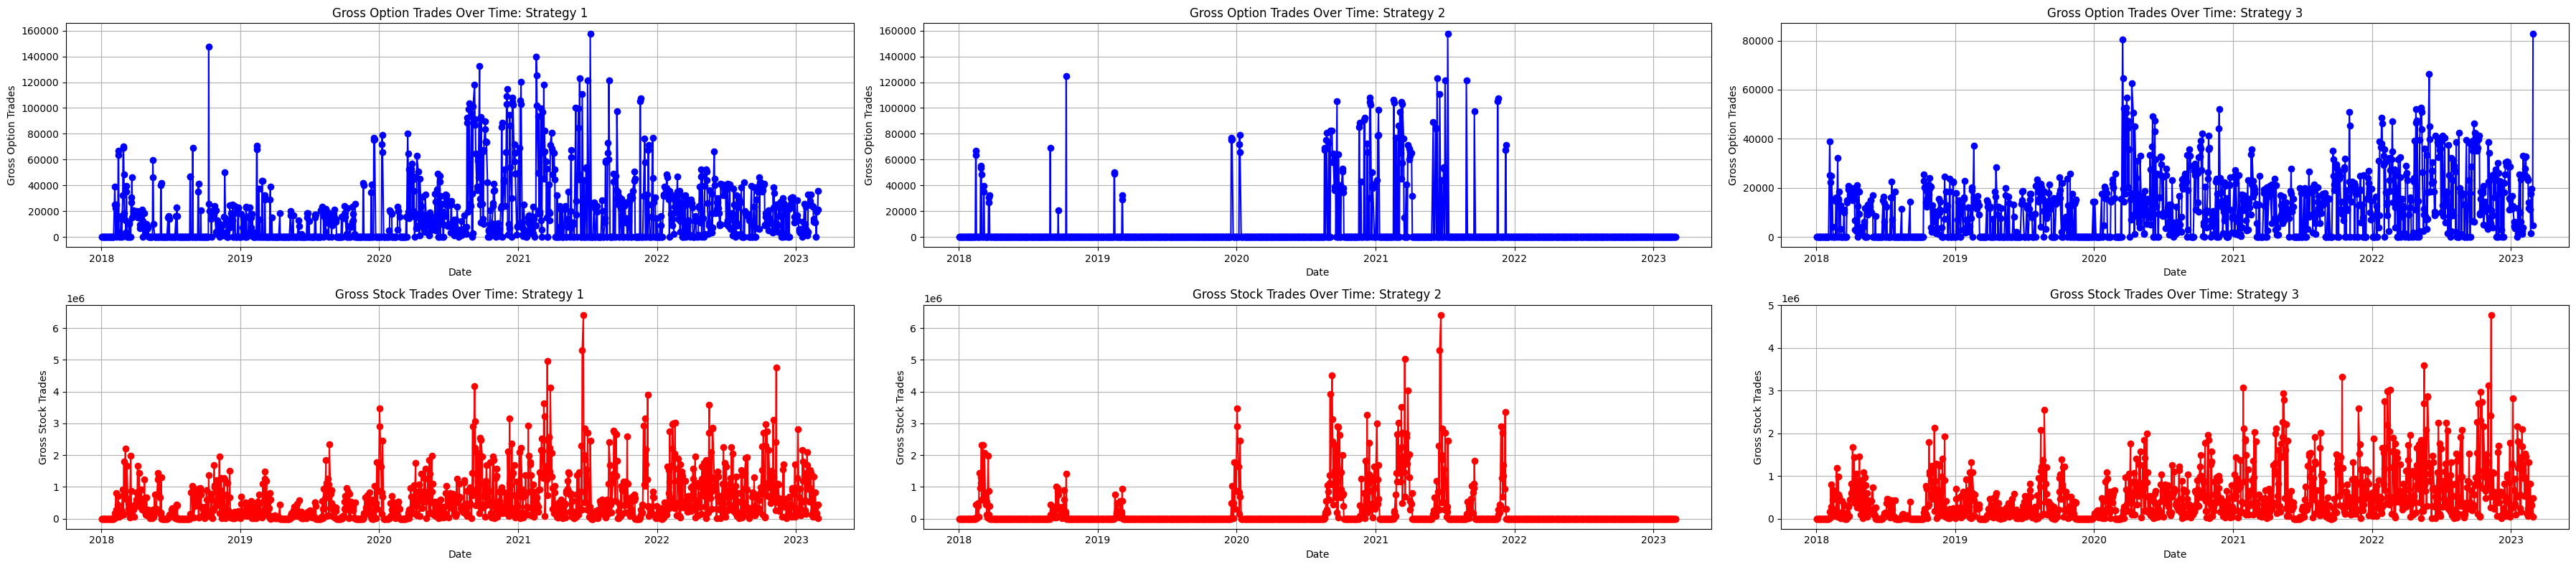

In [53]:
plot_trades_over_time(PL_trade_1, PL_trade_2, PL_trade_3)

The plots above show distinct patterns in gross option trades and gross stock trades over time for three different trading strategies.

For Strategy 1 and 3, the volume of gross option trades is quite volatile with a significant number of spikes, suggesting periods of high trading activity coupled with quieter times. Strategy 2 has significantly fewer spikes in both gross option and stock traded over time. 

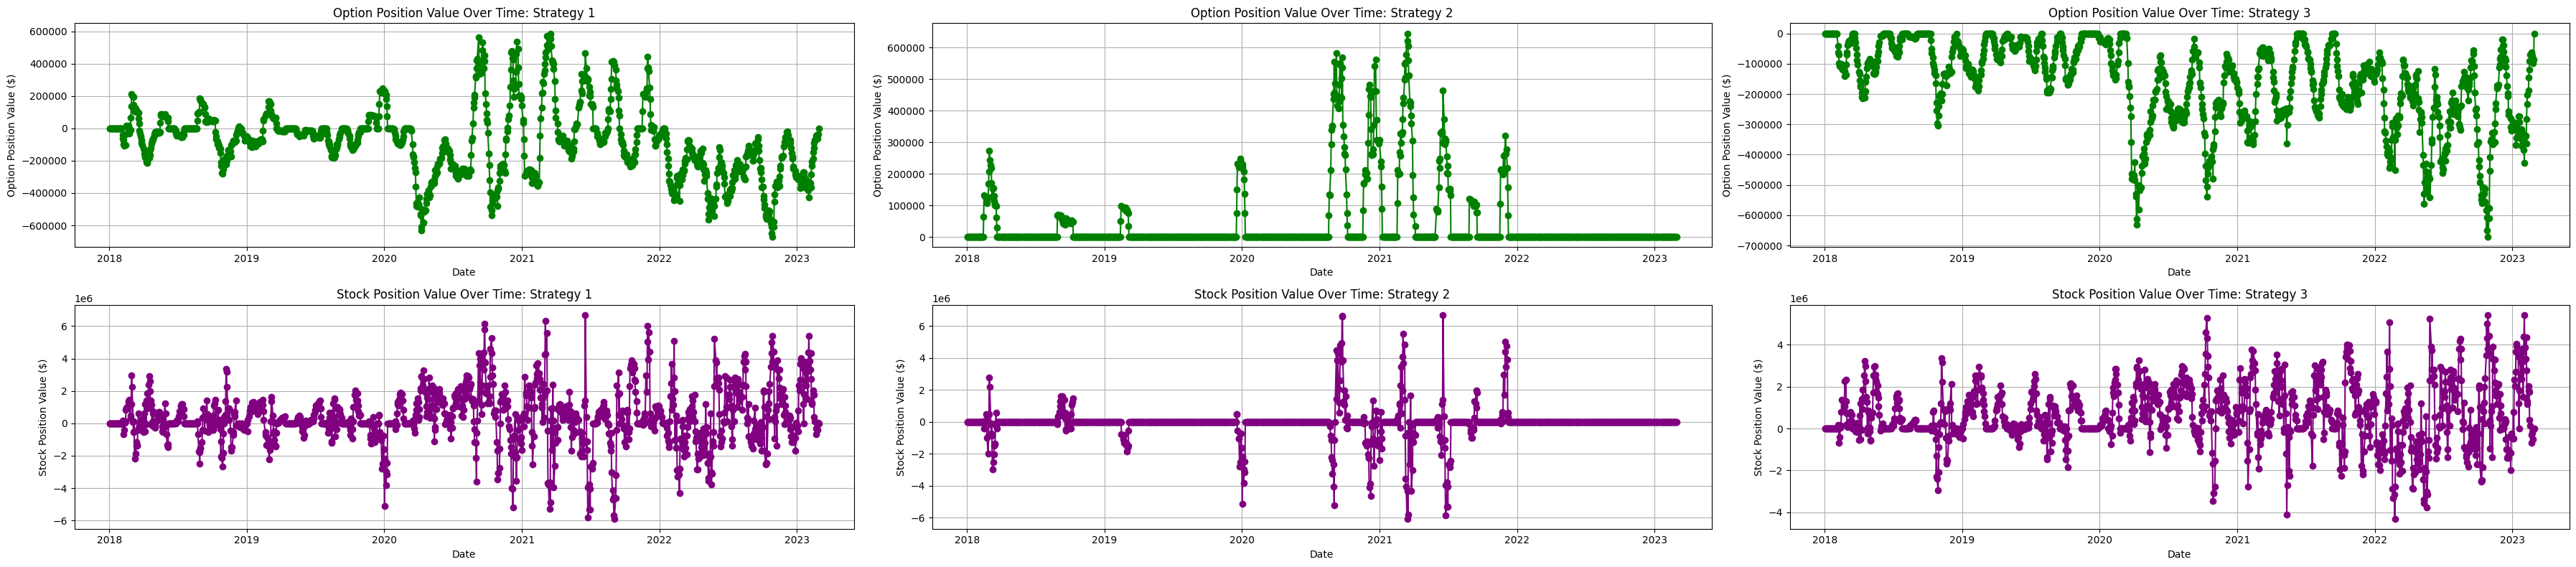

In [55]:
plot_position_values_over_time(PL_trade_1, PL_trade_2, PL_trade_3)

The plots illustrate the option and stock position values over time for the 3 trading strategies. In Strategy 1, there is significant fluctuations in option position value, with some periods showing substantial positive values, suggesting profitable option positions, followed by sharp declines indicating losses. The stock position value for Strategy 1, while also volatile, generally oscillates around a narrower range compared to the options, indicating less extreme changes in value but with notable periods of loss. Strategy 3 shows a similar pattern to Strategy 1 in terms of fluctuations.

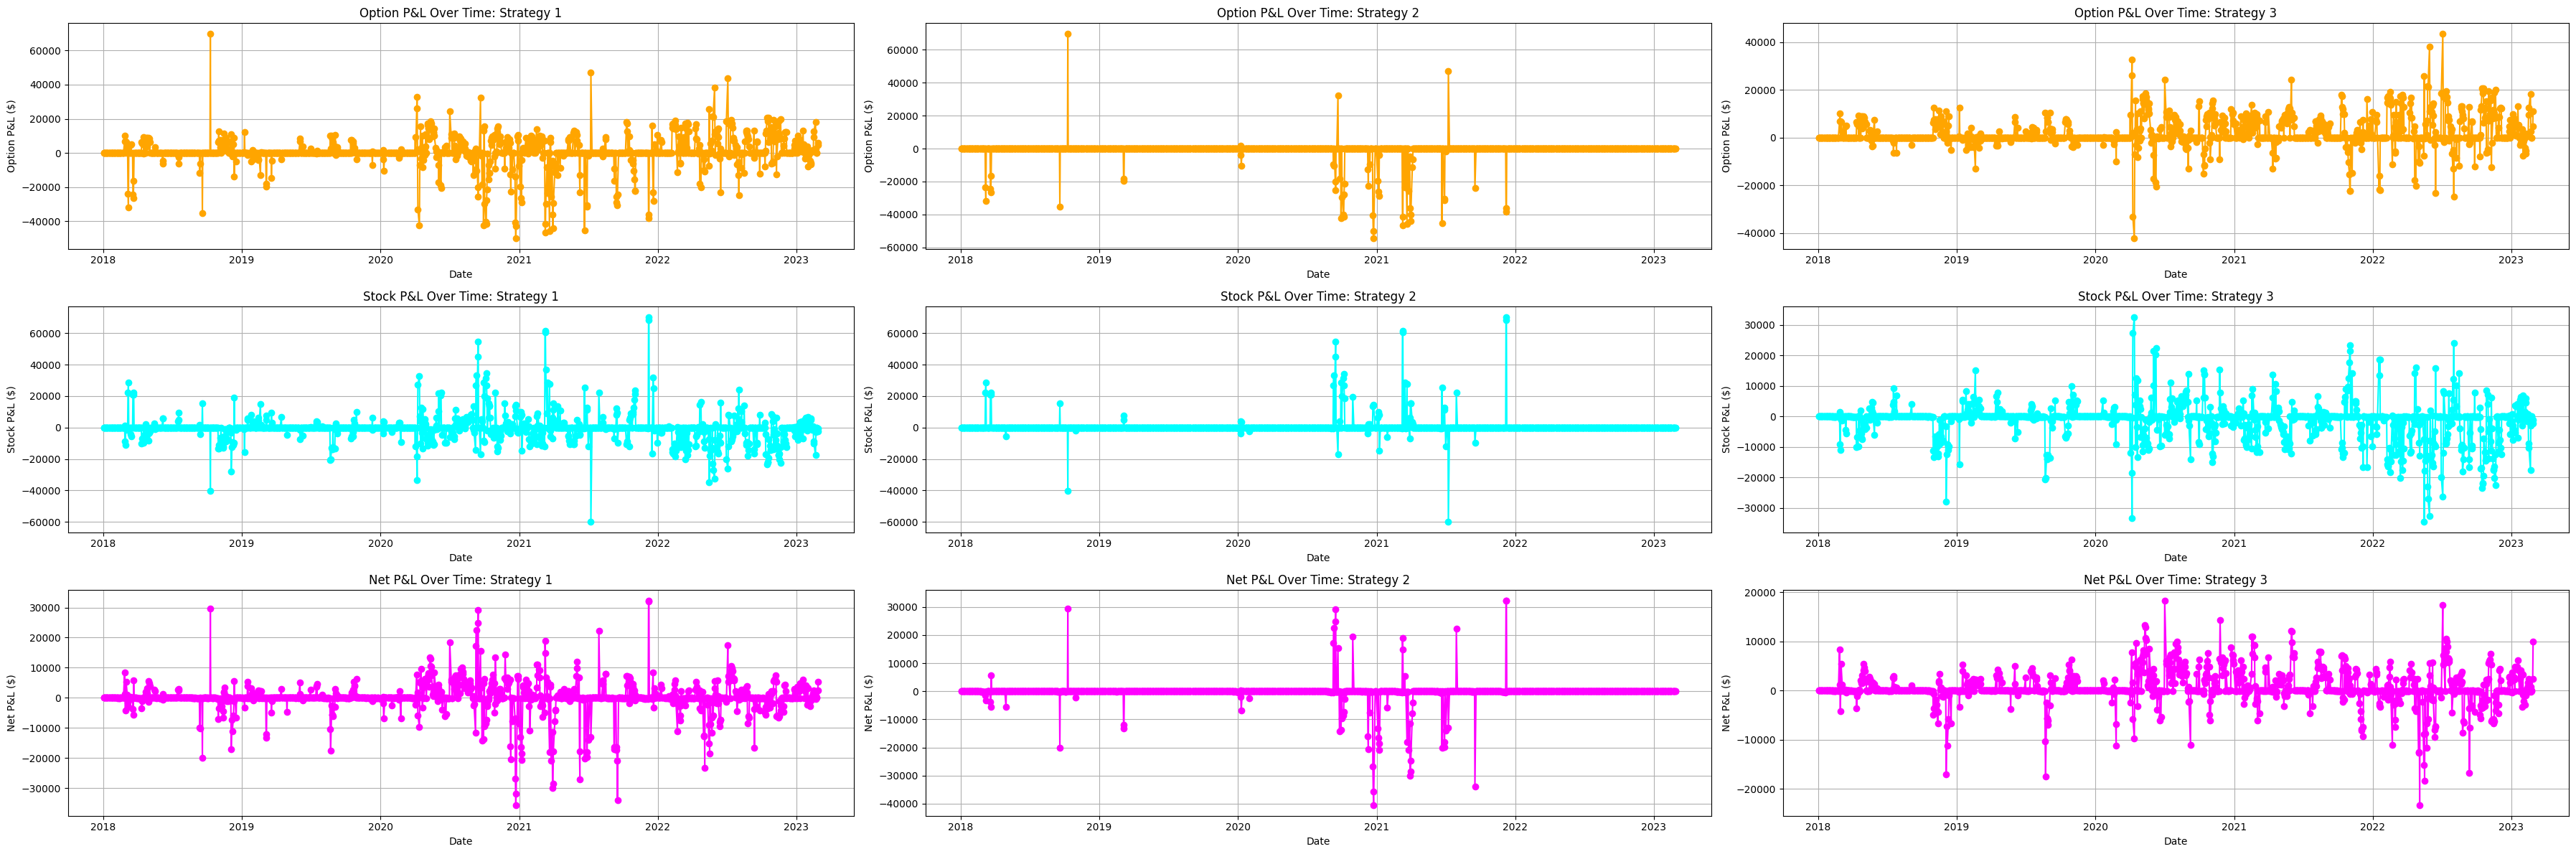

In [58]:
plot_pl_over_time(PL_trade_1, PL_trade_2, PL_trade_3)

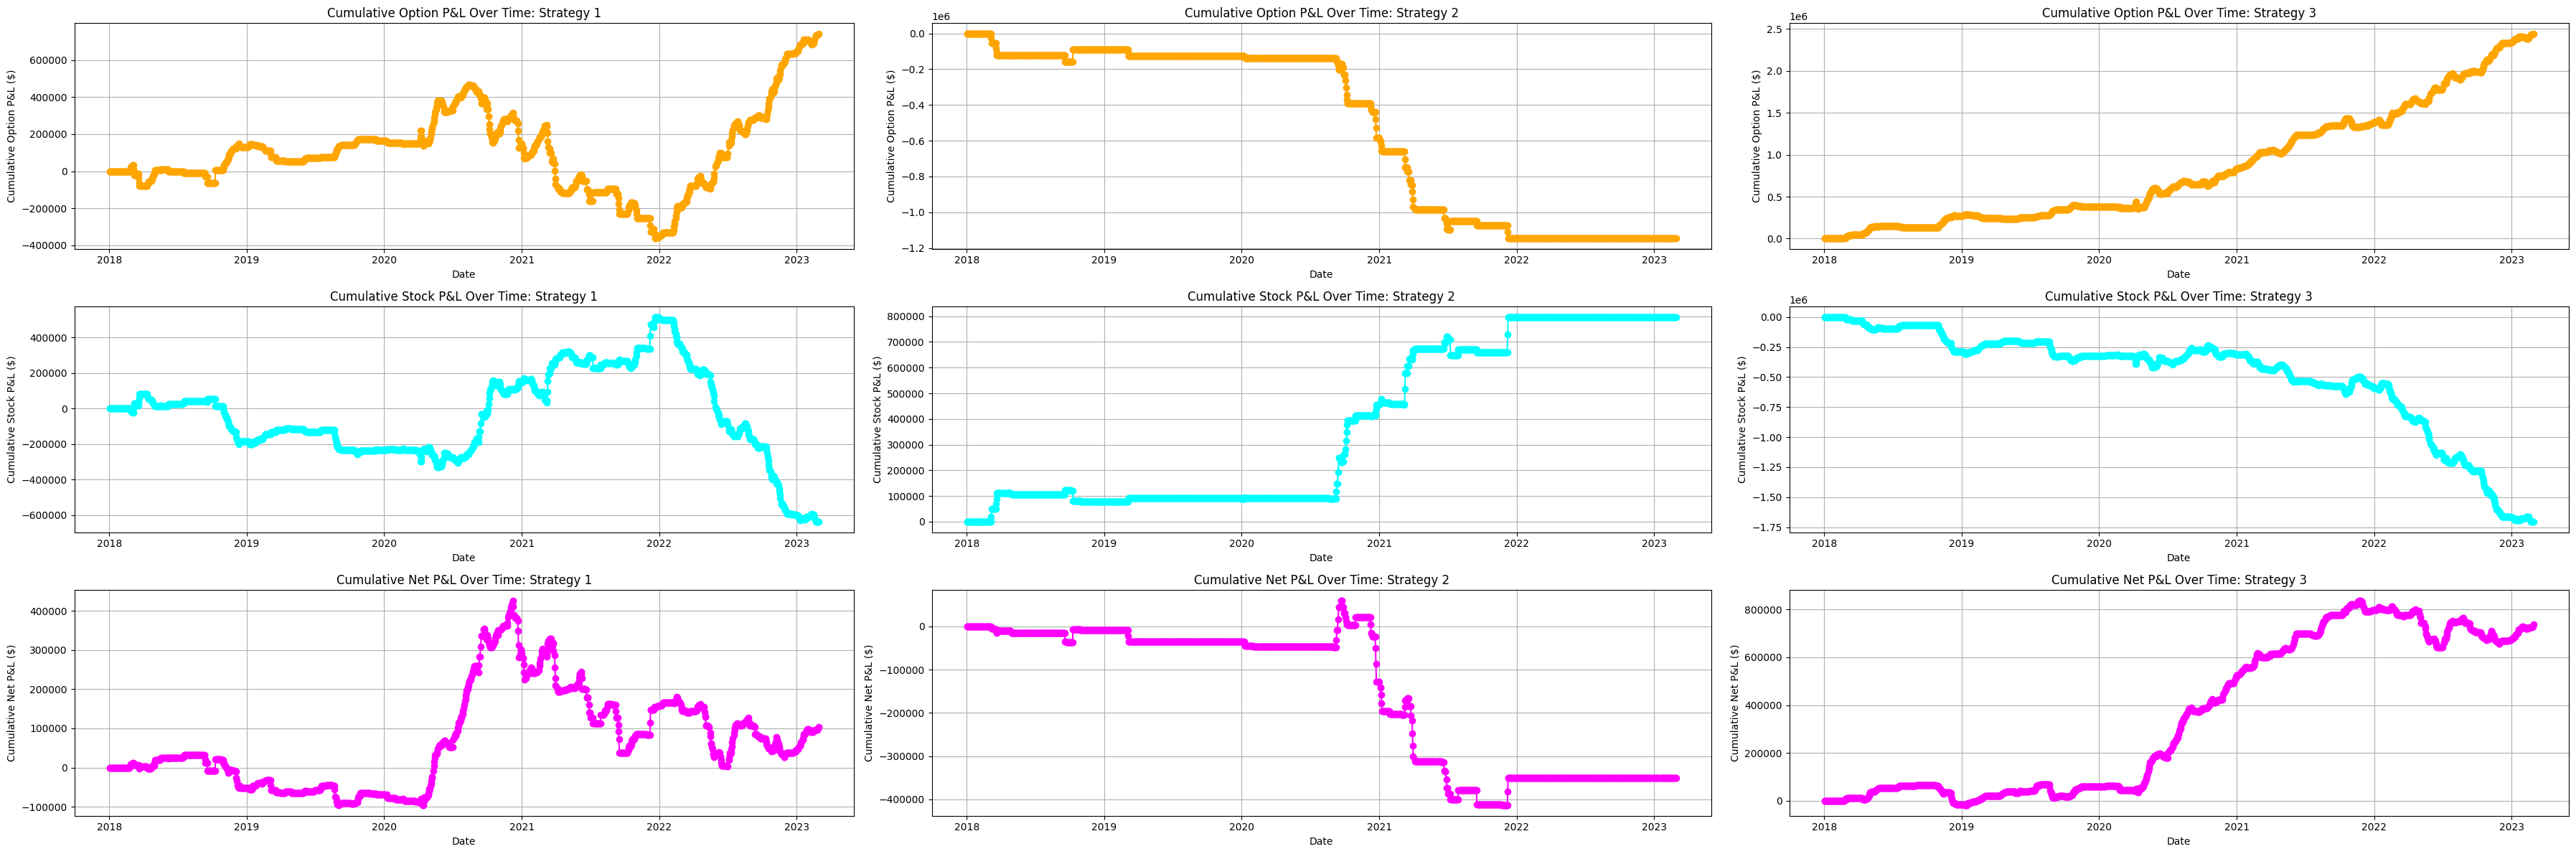

In [65]:
plot_cumulative_pl_over_time(PL_trade_1, PL_trade_2, PL_trade_3)

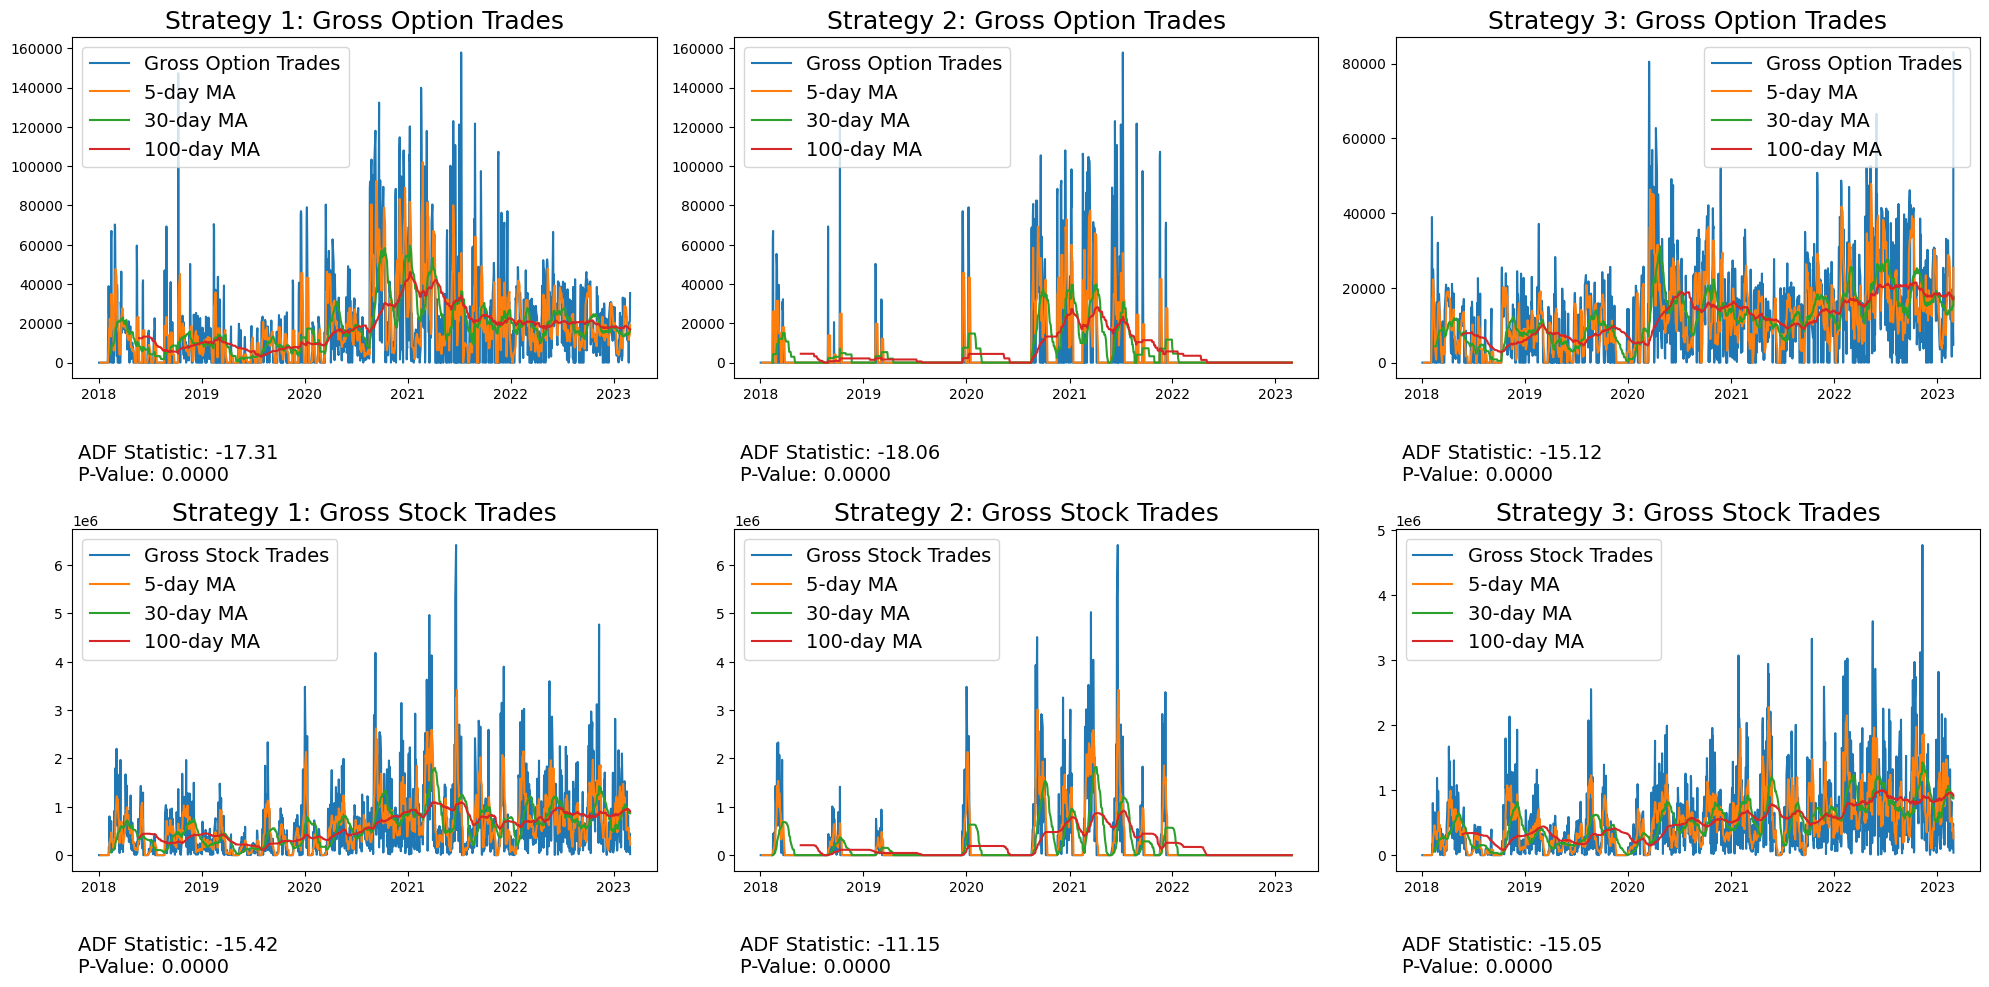

In [67]:
plot_trades_and_test_stationarity(PL_trade_1, PL_trade_2, PL_trade_3)

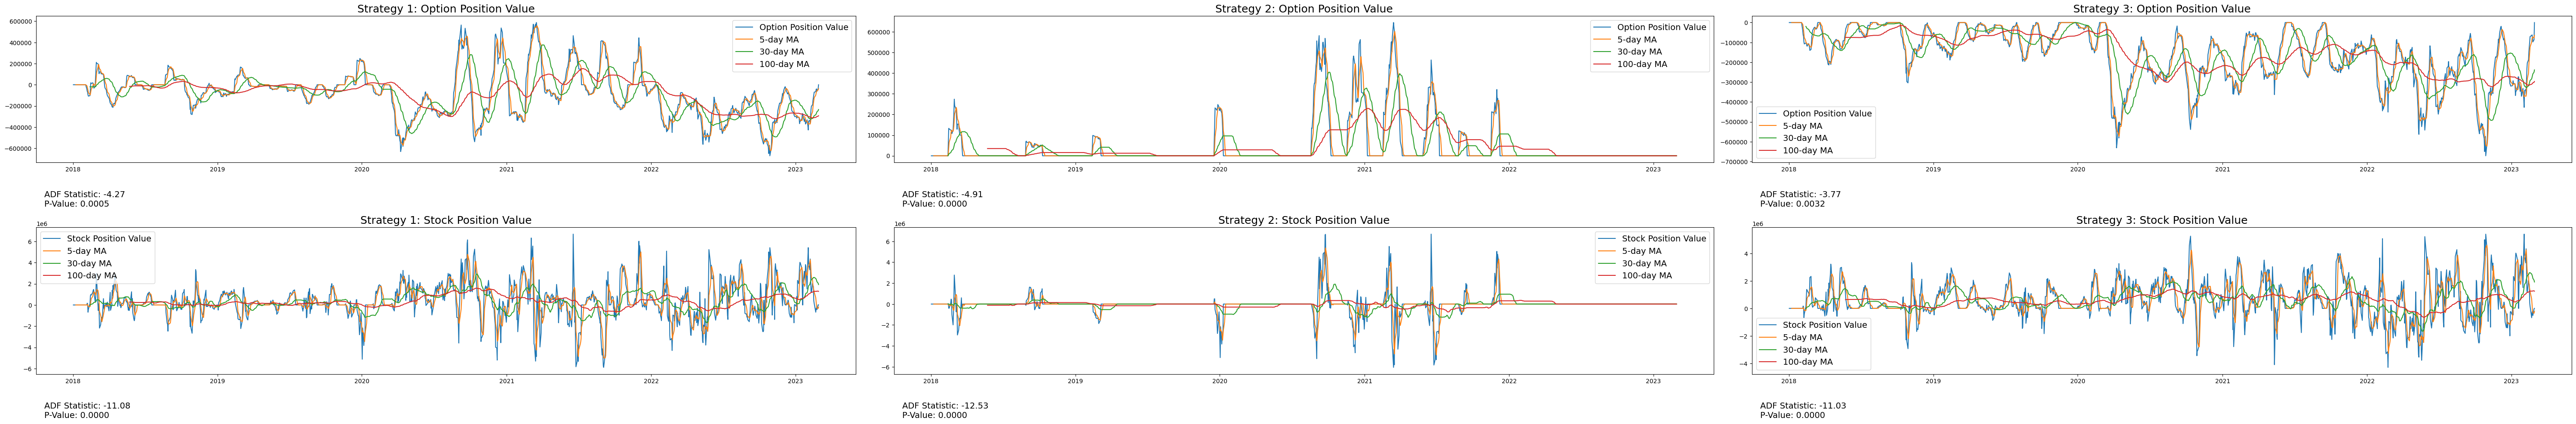

In [69]:
plot_position_values_and_test_stationarity(PL_trade_1, PL_trade_2, PL_trade_3)

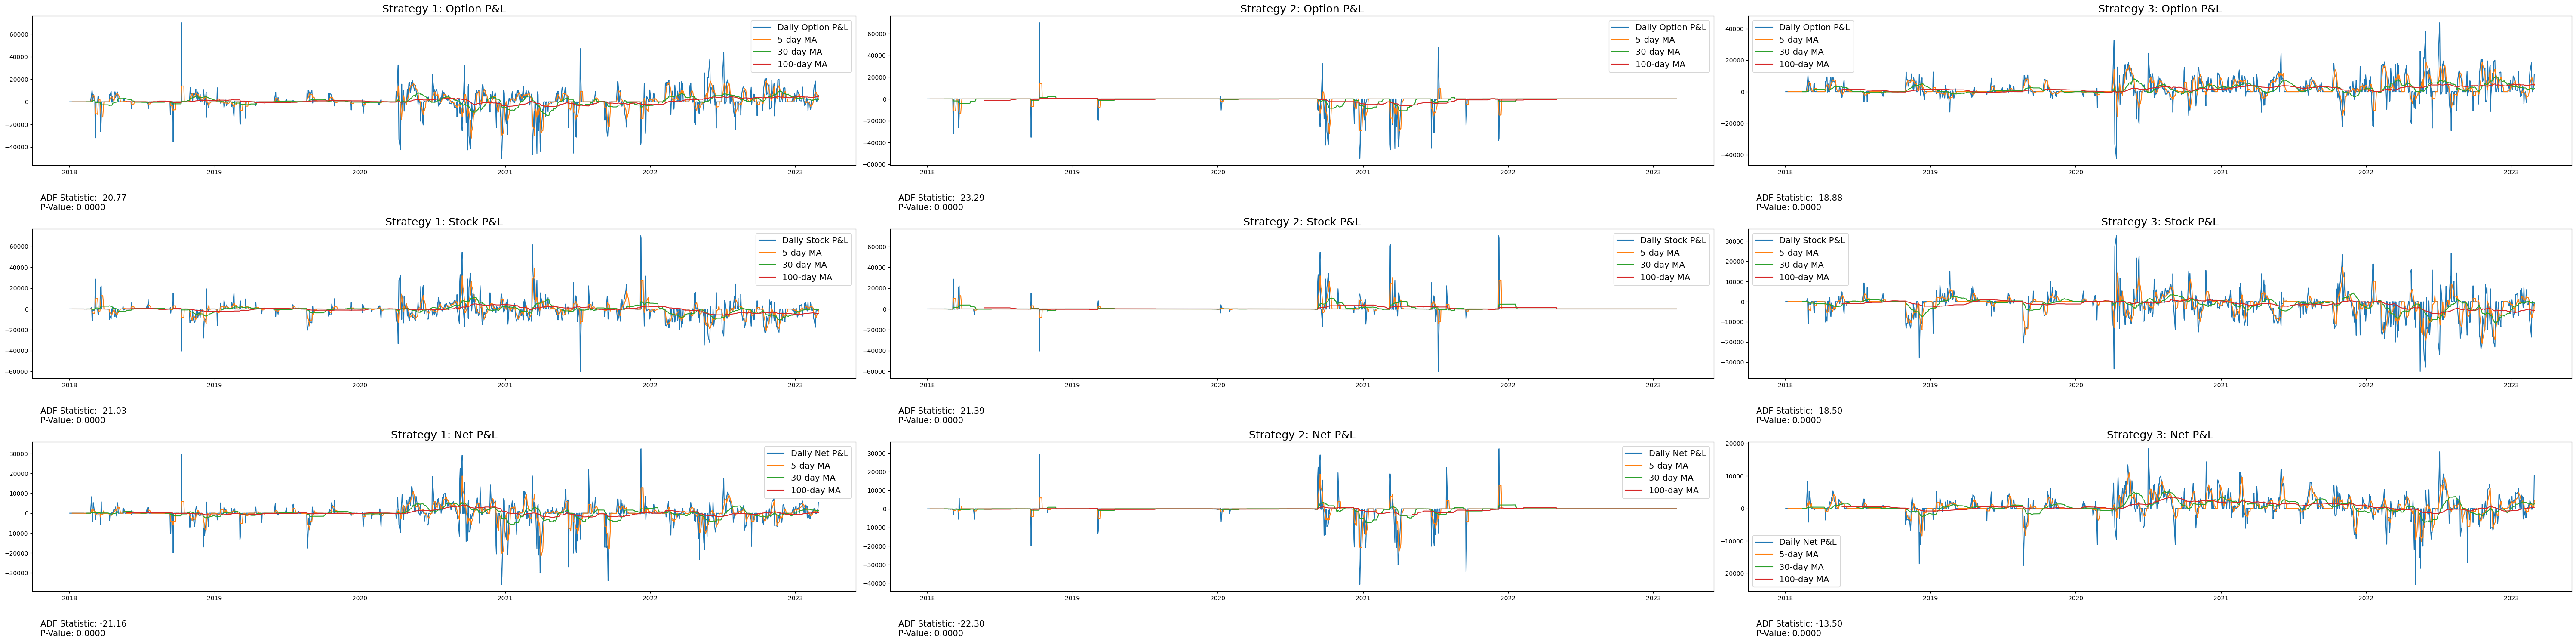

In [72]:
plot_pl_values_and_test_stationarity(PL_trade_1, PL_trade_2, PL_trade_3)

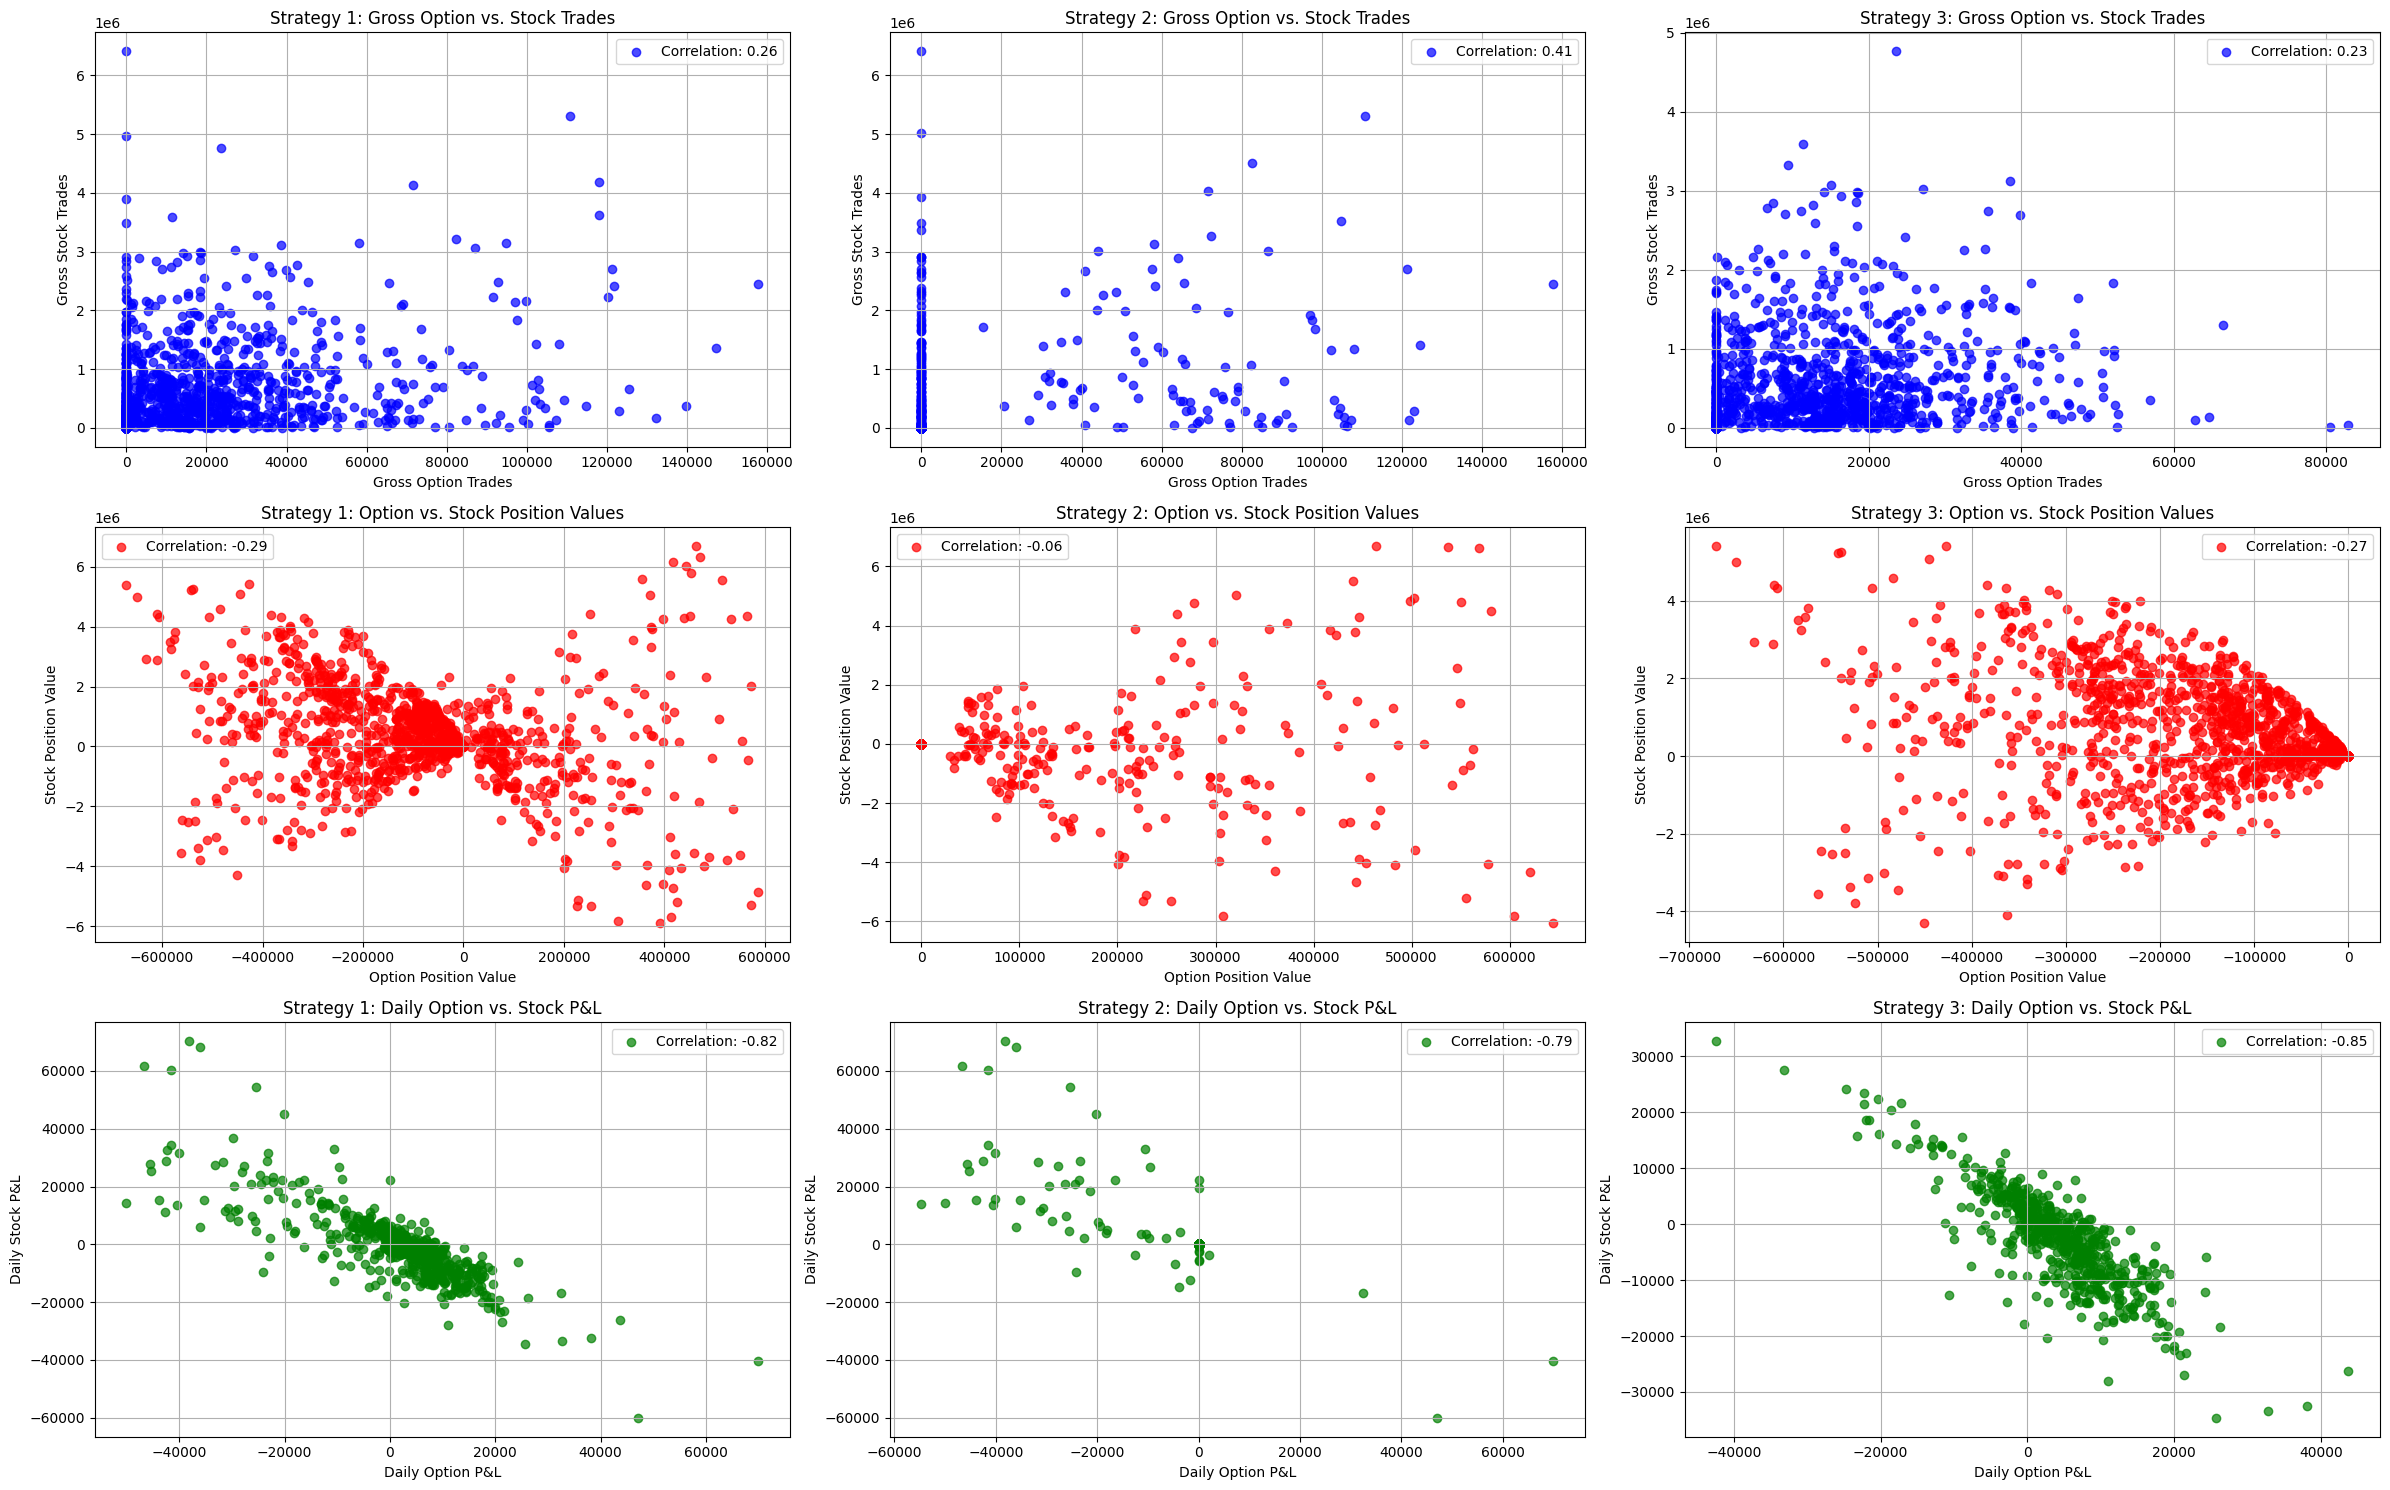

In [74]:
plot_correlations(PL_trade_1, PL_trade_2, PL_trade_3)

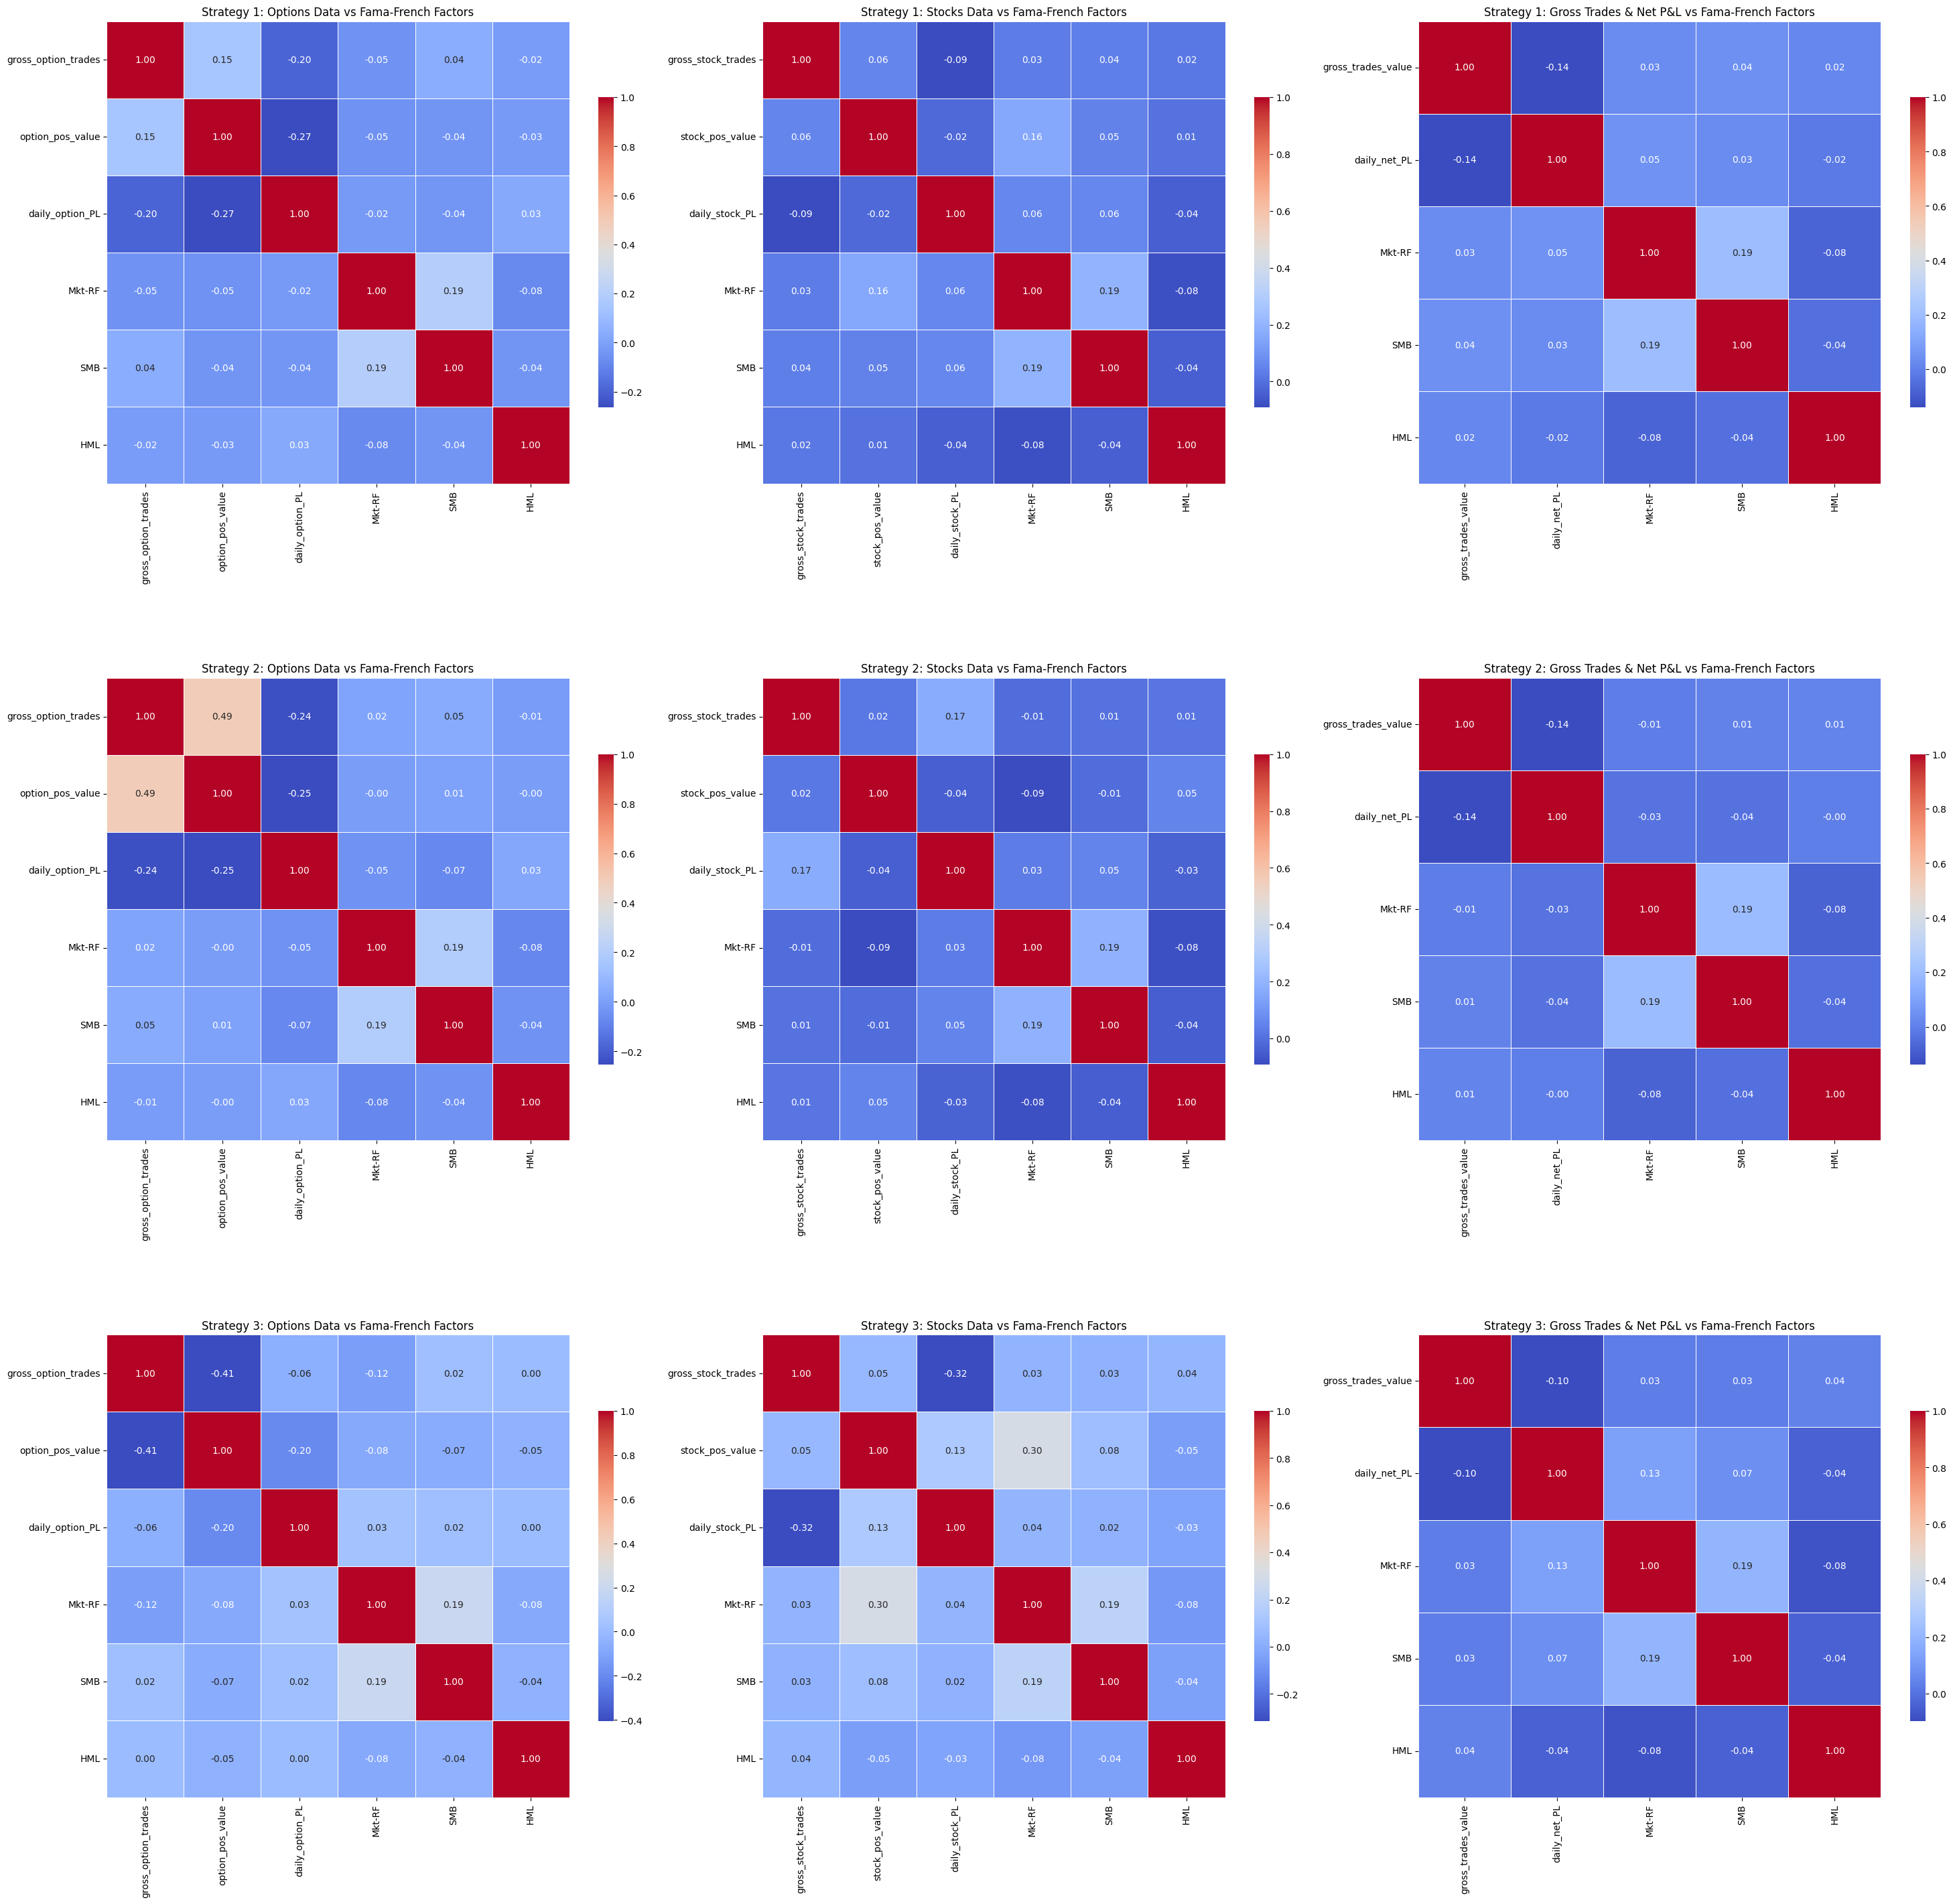

In [76]:
plot_correlation_matrices(PL_trade_1, PL_trade_2, PL_trade_3, fff_data=fff_data)

In [80]:
combined_1 = PL_trade_1.merge(fff_data, left_index=True, right_index=True, how='left')
combined_2 = PL_trade_2.merge(fff_data, left_index=True, right_index=True, how='left')
combined_3 = PL_trade_3.merge(fff_data, left_index=True, right_index=True, how='left')

In [82]:
run_regression_option_PL(combined_1, combined_2, combined_3)

Strategy 1: R-squared of the regression of option_PL on the Fama-French factors: 0.004904

Strategy 1 regression summary:
                            OLS Regression Results                            
Dep. Variable:              option_PL   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.126
Date:                Fri, 08 Mar 2024   Prob (F-statistic):             0.0952
Time:                        12:44:39   Log-Likelihood:                -17812.
No. Observations:                1298   AIC:                         3.563e+04
Df Residuals:                    1294   BIC:                         3.565e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

In [84]:
run_regression_stock_PL(combined_1, combined_2, combined_3)

Strategy 1: R-squared of the regression of stock_PL on the Fama-French factors: 0.004653

Strategy 1 regression summary:
                            OLS Regression Results                            
Dep. Variable:               stock_PL   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.016
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.110
Time:                        12:45:56   Log-Likelihood:                -17970.
No. Observations:                1298   AIC:                         3.595e+04
Df Residuals:                    1294   BIC:                         3.597e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

In [86]:
run_regression_net_PL(combined_1, combined_2, combined_3)

Strategy 1: R-squared of the regression of net_PL on the Fama-French factors: 0.007555

Strategy 1 regression summary:
                            OLS Regression Results                            
Dep. Variable:                 net_PL   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.283
Date:                Fri, 08 Mar 2024   Prob (F-statistic):             0.0202
Time:                        12:47:09   Log-Likelihood:                -17040.
No. Observations:                1298   AIC:                         3.409e+04
Df Residuals:                    1294   BIC:                         3.411e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

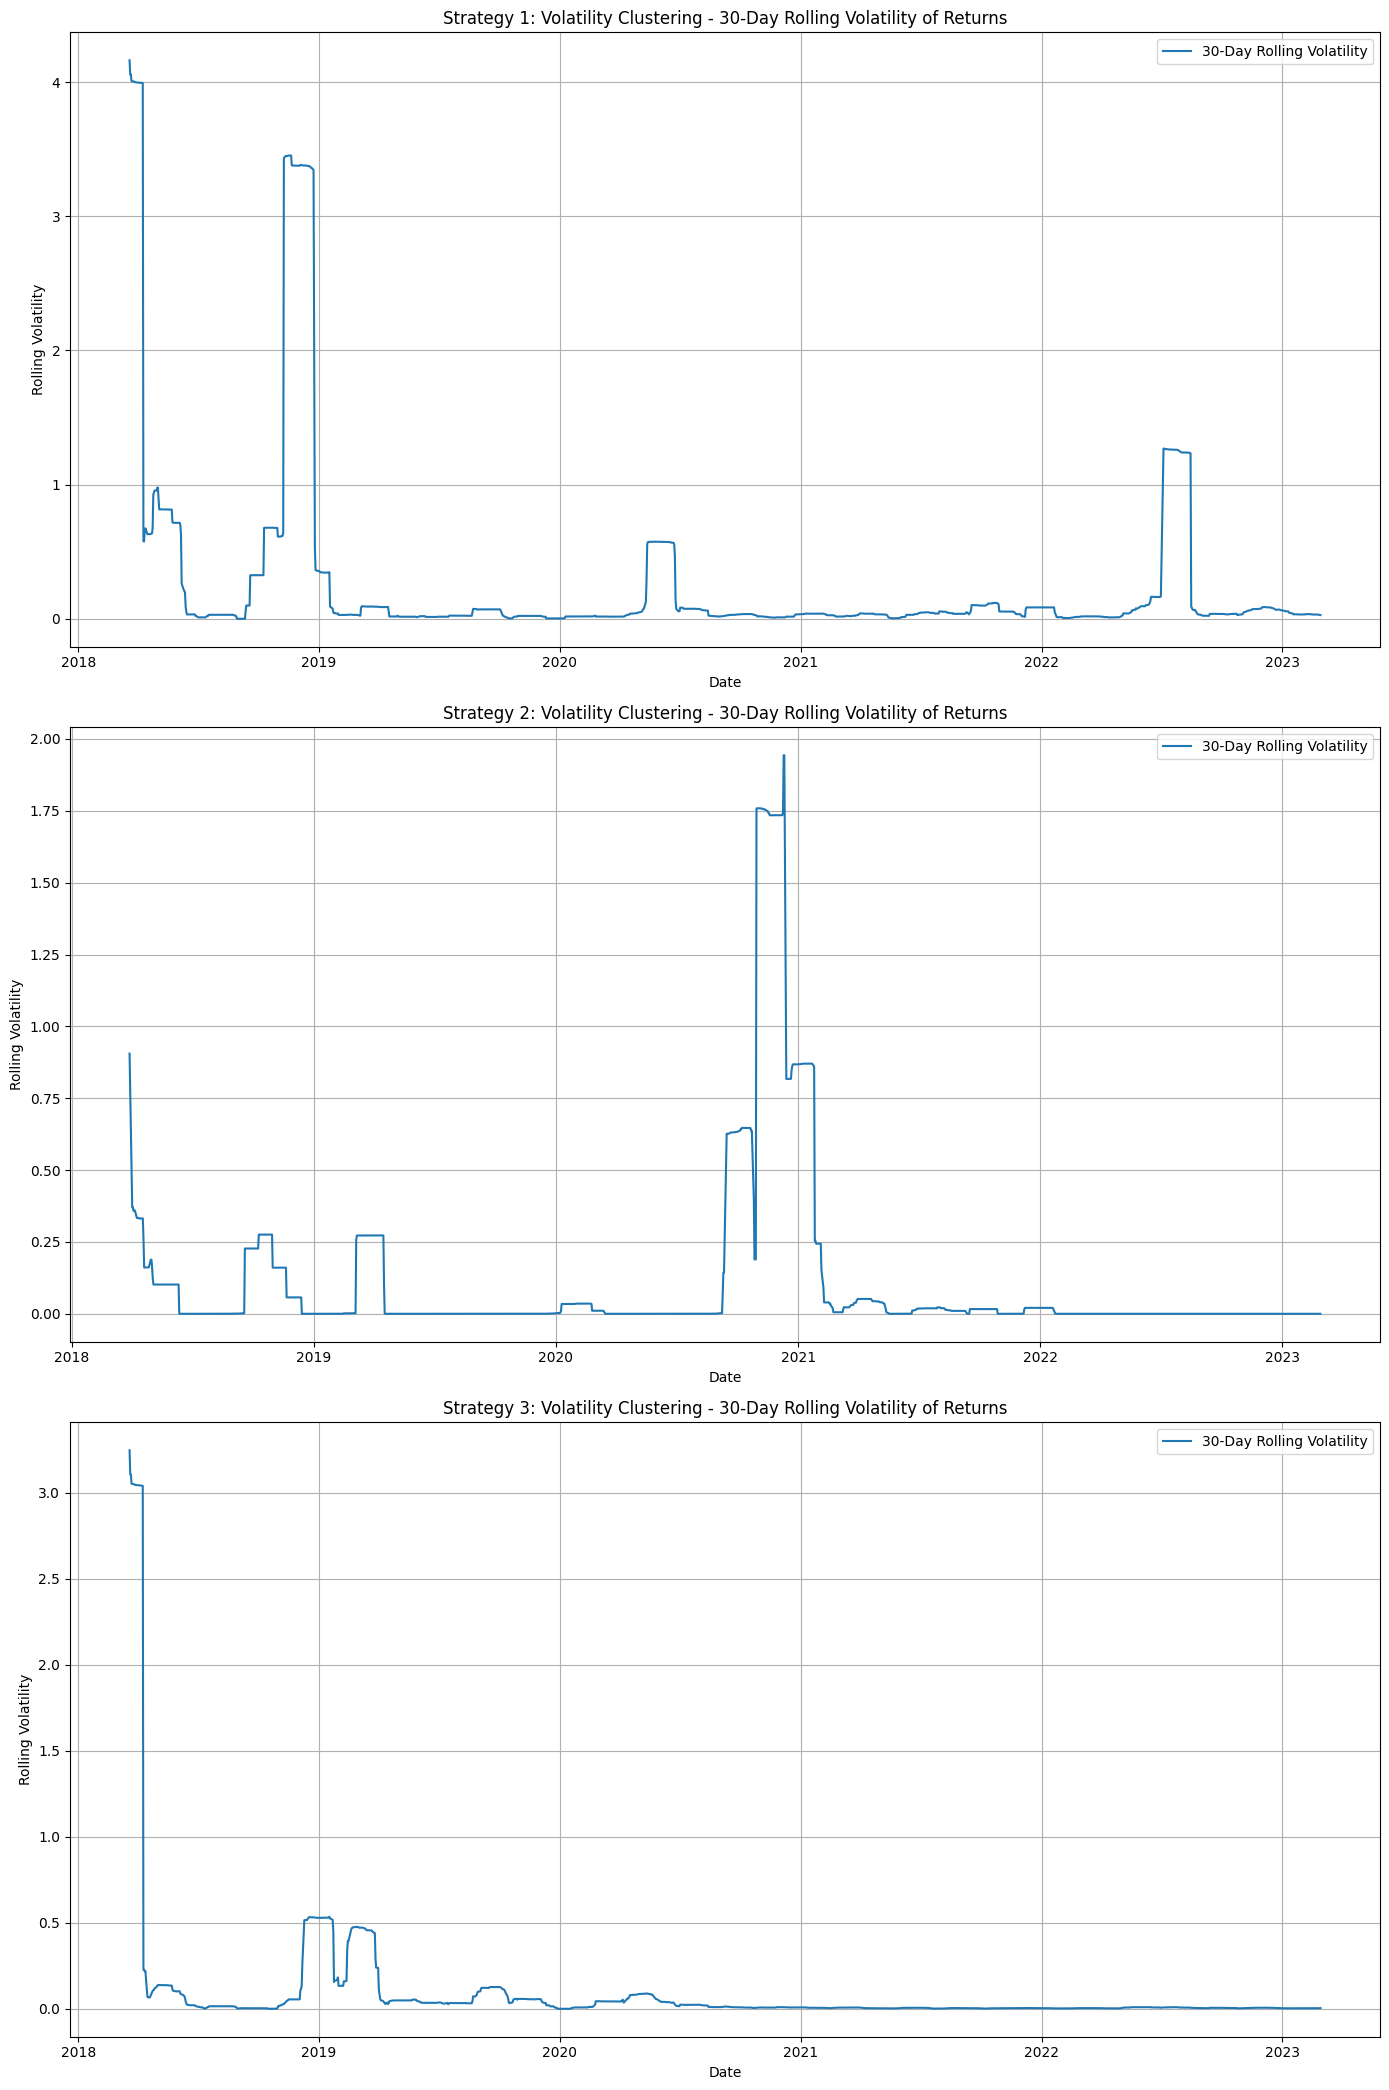

In [88]:
plot_rolling_volatility(combined_1, combined_2, combined_3, window_size=30)

/var/folders/37/_d3r4q095fs6bf6w7rqvdkf40000gn/T/ipykernel_35323/3721504081.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df['monthly_pnl'] = combined_df['net_PL'].resample('M').last().diff()


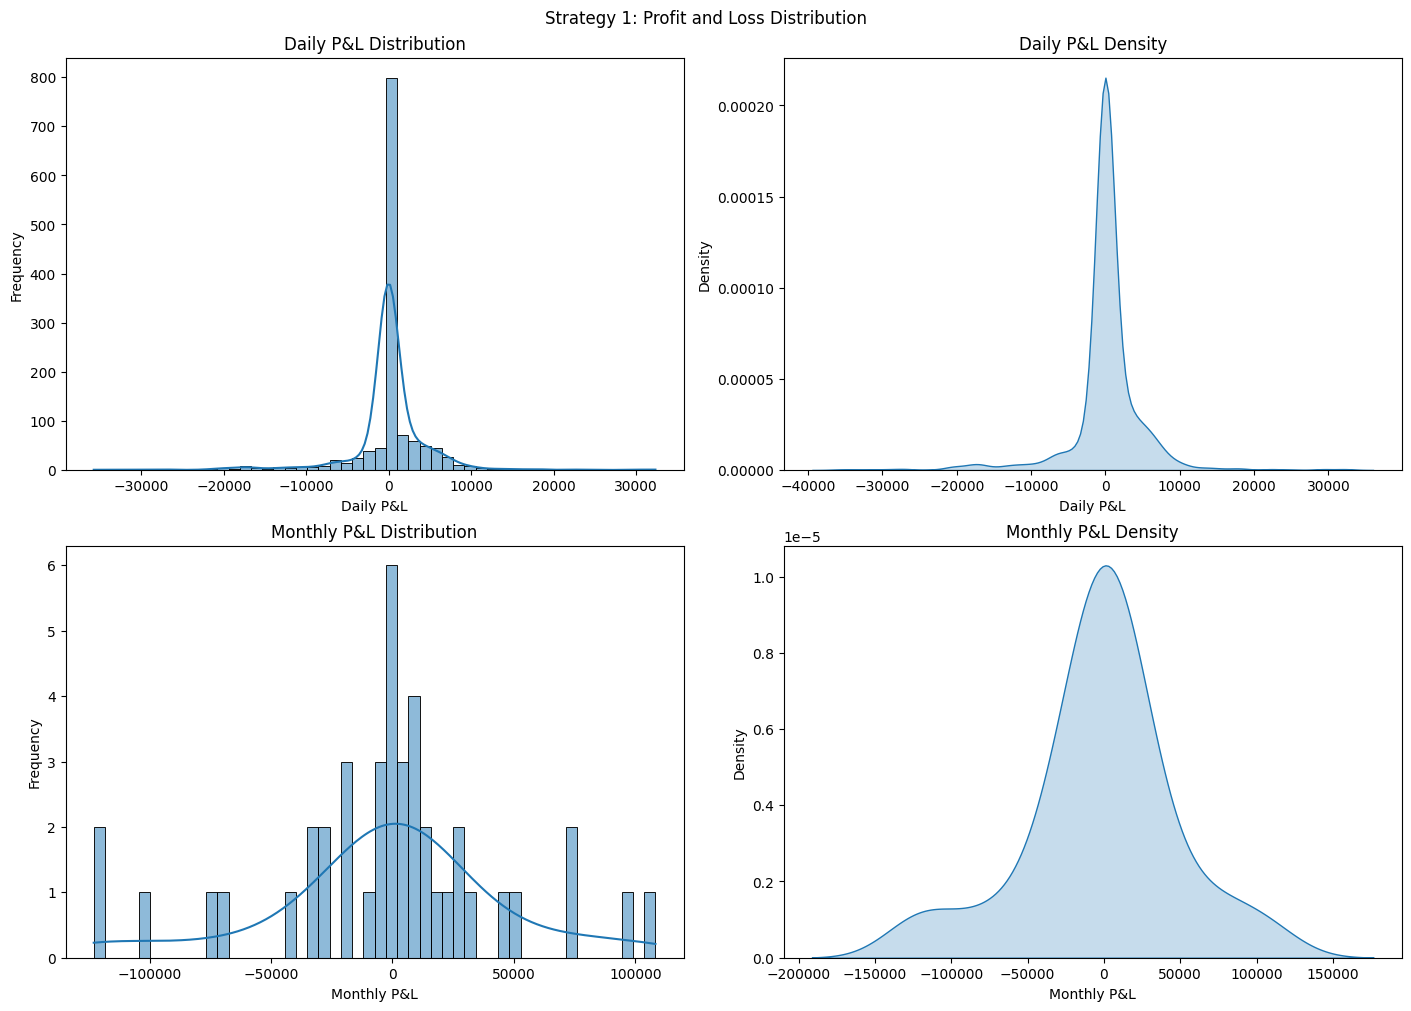

/var/folders/37/_d3r4q095fs6bf6w7rqvdkf40000gn/T/ipykernel_35323/3721504081.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df['monthly_pnl'] = combined_df['net_PL'].resample('M').last().diff()


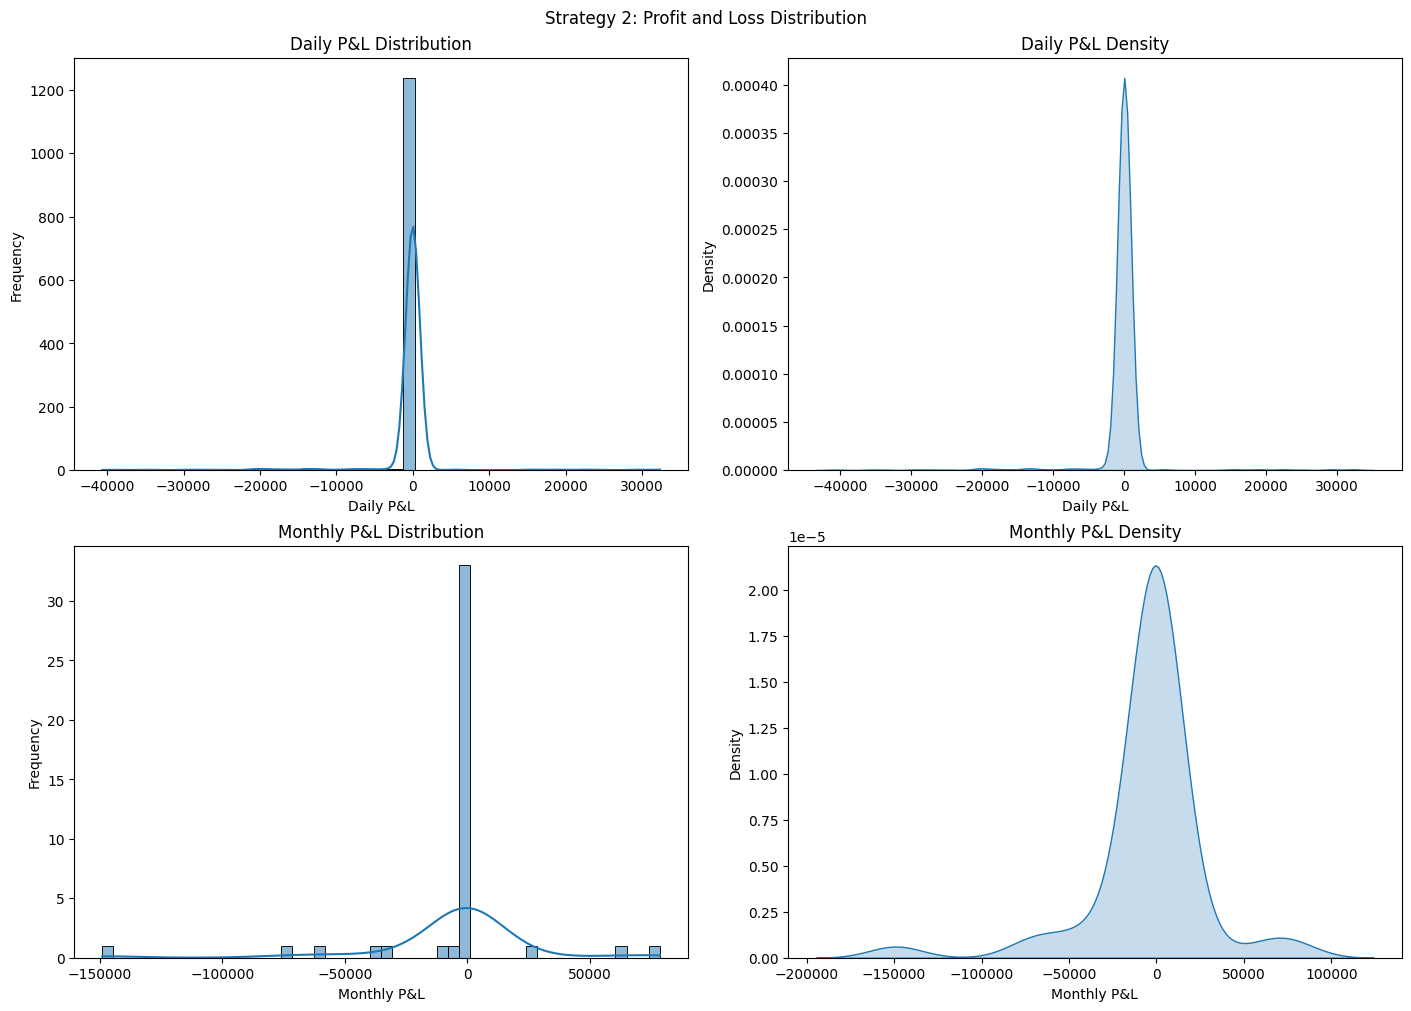

/var/folders/37/_d3r4q095fs6bf6w7rqvdkf40000gn/T/ipykernel_35323/3721504081.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df['monthly_pnl'] = combined_df['net_PL'].resample('M').last().diff()


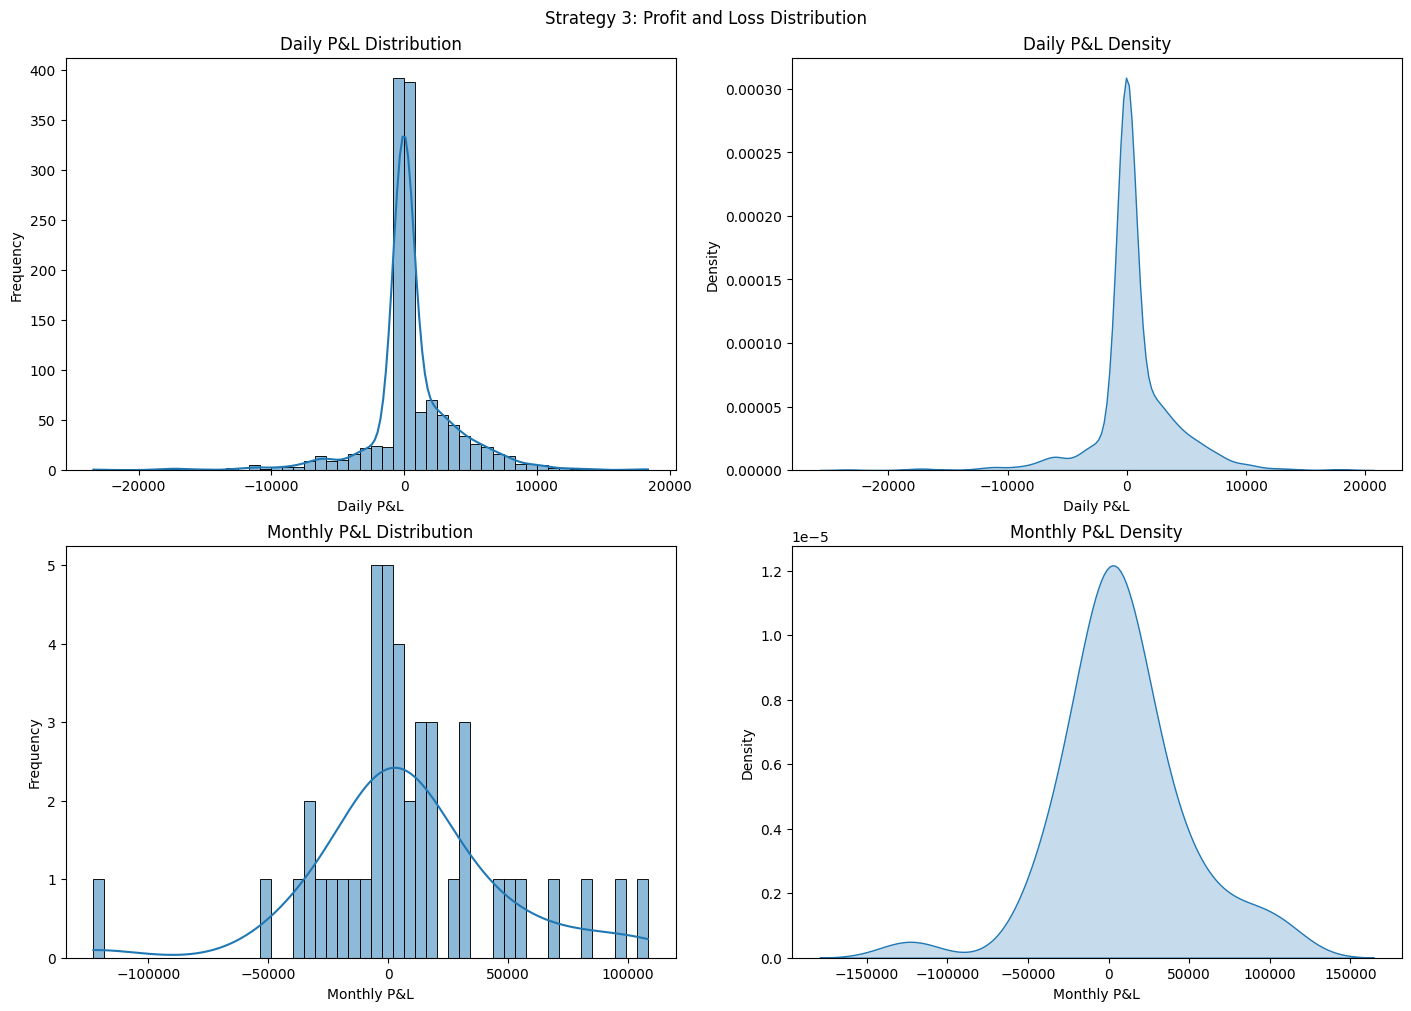

In [93]:
plot_pnl_distribution(combined_1, combined_2, combined_3)

<Figure size 1400x700 with 0 Axes>

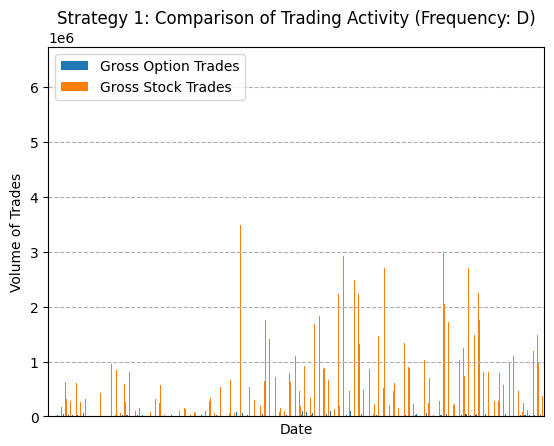

<Figure size 1400x700 with 0 Axes>

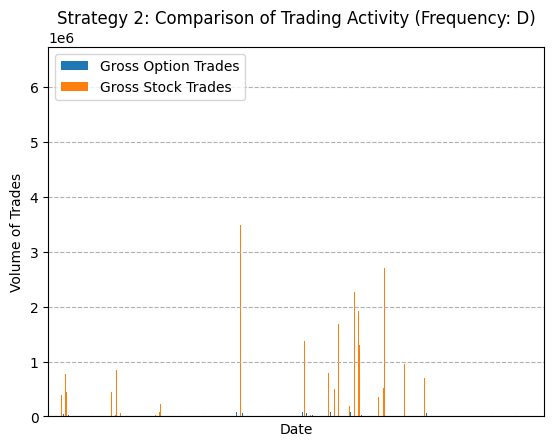

<Figure size 1400x700 with 0 Axes>

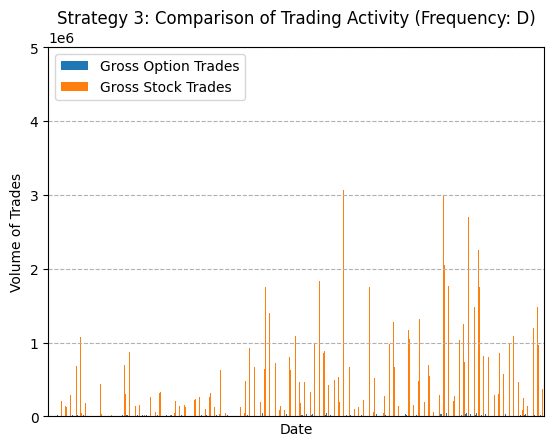

In [95]:
plot_trade_activity_comparison(combined_1, combined_2, combined_3, frequency='D')

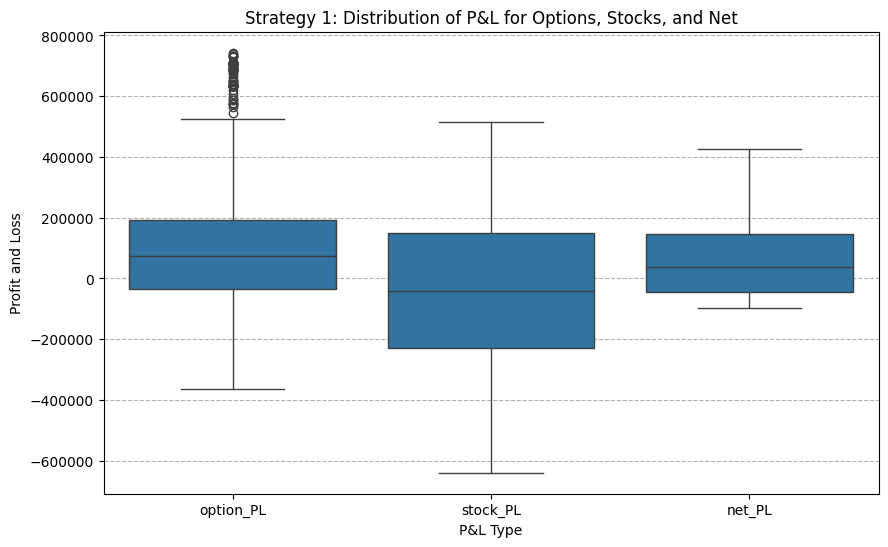

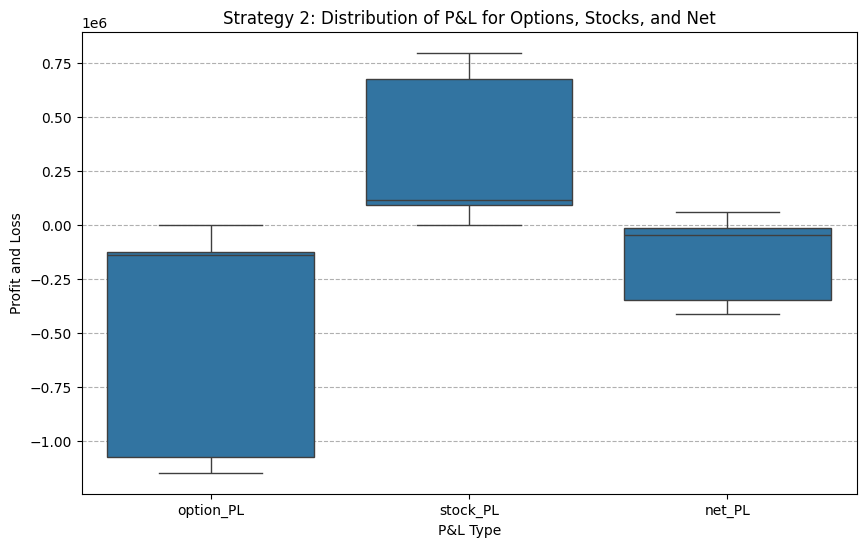

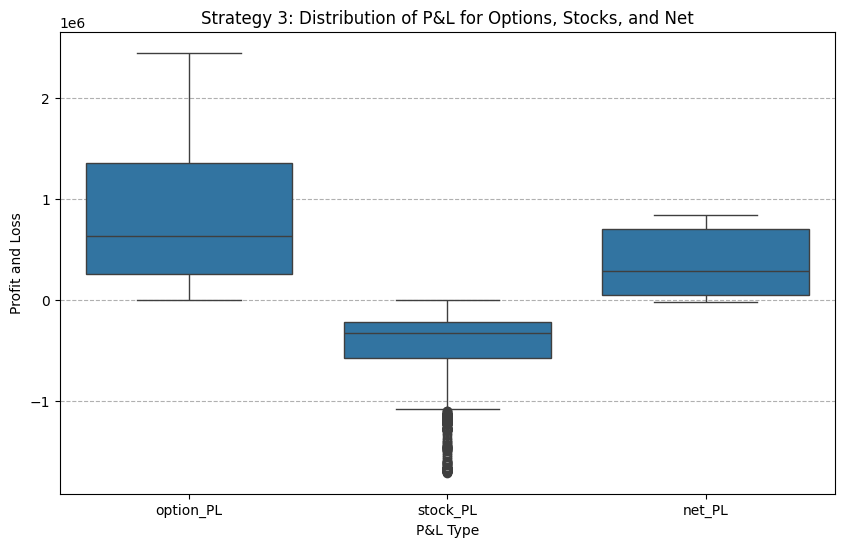

In [97]:
plot_pl_boxplots(combined_1, combined_2, combined_3)

In [99]:
calculate_profit_factor_analysis(combined_1, combined_2, combined_3)

Strategy 1: Option Profit Factor: 1.3151748045704375
Strategy 1: Stock Profit Factor: 0.772373554499564

Strategy 2: Option Profit Factor: 0.11664217051956986
Strategy 2: Stock Profit Factor: 4.939689657008045

Strategy 3: Option Profit Factor: 3.6354558279313216
Strategy 3: Stock Profit Factor: 0.41341462981838445



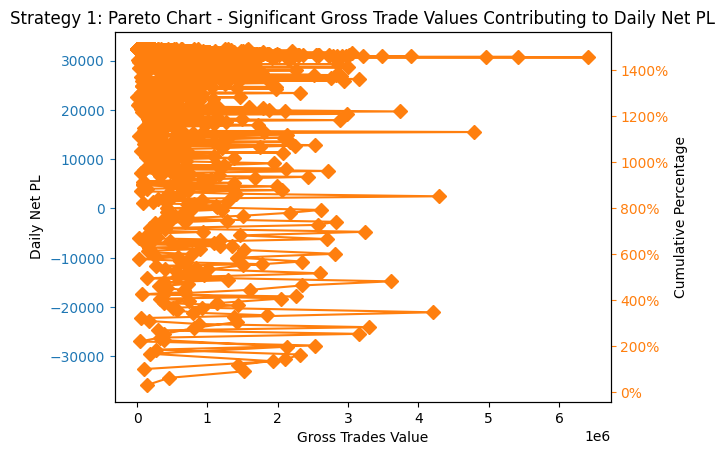

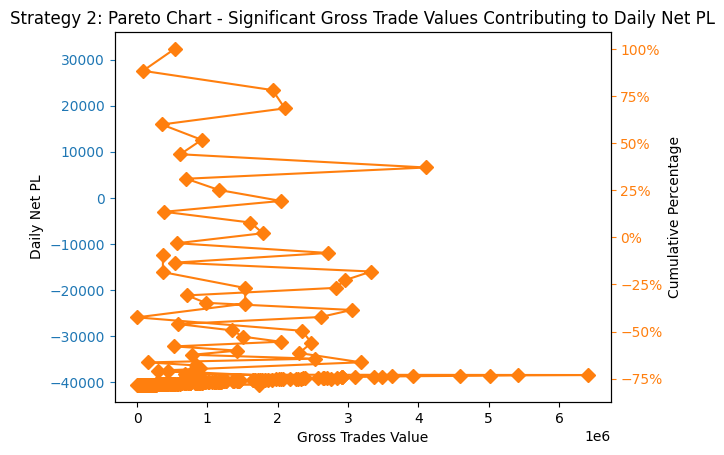

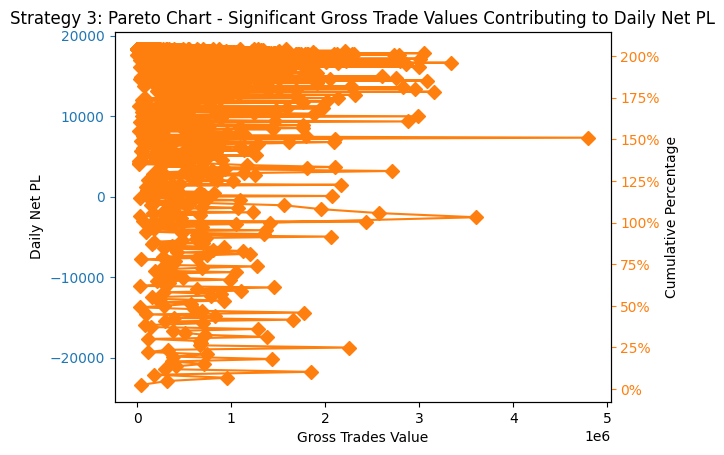

In [101]:
plot_pareto_chart(combined_1, combined_2, combined_3)